In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel("Dataset/Superstore.xls")

# Análisis Exploratorio de Datos

In [3]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  Per unit (discount)  Per unit (no discount)  \
0      0.00   41.9136             130.9800                  130.98   
1      0.00  219.5820             243.9800                  243.98   
2      0.00    6.8714               7.3100                    7.31   
3      0.45 -383.0310             191.5155                  348.21   
4      0.20    2.5164              11.1840                   13.98   

   Sales (no discount)  cost per unit  
0               261.96       110.0232  
1               731.94       170.7860  
2                14.62         3.8743  
3              1741.05       268.1217  
4                27.96         9.9258

In [4]:
keep = ['Order Date', 'Sales']
ventas = df.loc[:,keep]
ventas.head()

Order Date     Sales
0 2016-11-08  261.9600
1 2016-11-08  731.9400
2 2016-06-12   14.6200
3 2015-10-11  957.5775
4 2015-10-11   22.3680

In [5]:
ventas.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [6]:
ventas.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [7]:
fecha_minima = df['Order Date'].min().strftime('%d-%m-%Y')
fecha_maxima = df['Order Date'].max().strftime('%d-%m-%Y')
print("Fecha mínima:", fecha_minima)
print("Fecha máxima:", fecha_maxima)

Fecha mínima: 03-01-2014
Fecha máxima: 30-12-2017


In [8]:
fig = go.Figure()

for year in range(2014, 2018):
    rango_fechas = df.loc[df['Order Date'].dt.year == year]
    ventas_año = rango_fechas.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()
    fig.add_trace(go.Scatter(x=ventas_año['Order Date'], y=ventas_año['Sales'], mode='lines', name=f'Ventas {year}'))

fig.update_layout(title='Ventas 2014-2017')
fig.update_layout(yaxis_title="Ventas ($)")

fig.show()

In [9]:
for year in range(2014, 2018):
    rango_fechas = df.loc[(df['Order Date'].dt.year == year)]
    ventas_año = rango_fechas.groupby('Order Date').agg({'Sales': 'sum'})
    fig = px.line(ventas_año, title=f'Ventas {year}')
    fig.update_layout(yaxis_title="Ventas ($)")
    fig.show()

In [10]:
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')

In [11]:
ventas_por_mes = df.groupby('month')['Sales'].sum()
ventas_por_mes = pd.DataFrame(ventas_por_mes)
ventas_por_mes['time'] = np.arange(len(ventas_por_mes.index))
ventas_por_mes.index = ventas_por_mes.index.to_timestamp()
ventas_por_mes.head()

Sales  time
month                      
2014-01-01  14236.895     0
2014-02-01   4519.892     1
2014-03-01  55691.009     2
2014-04-01  28295.345     3
2014-05-01  23648.287     4

In [12]:
for year in range(2014, 2018):
    rango_fechas2 = ventas_por_mes.loc[(ventas_por_mes.index.year == year)]
    ventas_por_mes_año = rango_fechas2.groupby('month').agg({'Sales': 'sum'})
    fig = px.line(ventas_por_mes_año, title=f'Ventas {year} por mes')
    fig.update_yaxes(title_text="Ventas ($)")
    fig.show()

# Predicciones

## Metodo 1: Media movil

In [375]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_pinball_loss
from sklearn.metrics import d2_tweedie_score
from sklearn.metrics import d2_pinball_score

In [510]:
df2 = df.copy()
df2.drop('Order ID',axis = 1, inplace = True)
df2['Order Date'] = pd.to_datetime(df2['Order Date'], format='%d/%m/%Y')
df2.sort_values(by=['Order Date'], inplace=True, ascending=True)
df2.set_index('Order Date', inplace = True)

ventas_por_dia = pd.DataFrame(df2['Sales'])
ventas_por_dia =  pd.DataFrame(ventas_por_dia['Sales'].resample('D').sum())
ventas_por_dia.head()

Sales
Order Date          
2014-01-03    16.448
2014-01-04   288.060
2014-01-05    19.536
2014-01-06  4407.100
2014-01-07    87.158

#### Por mes

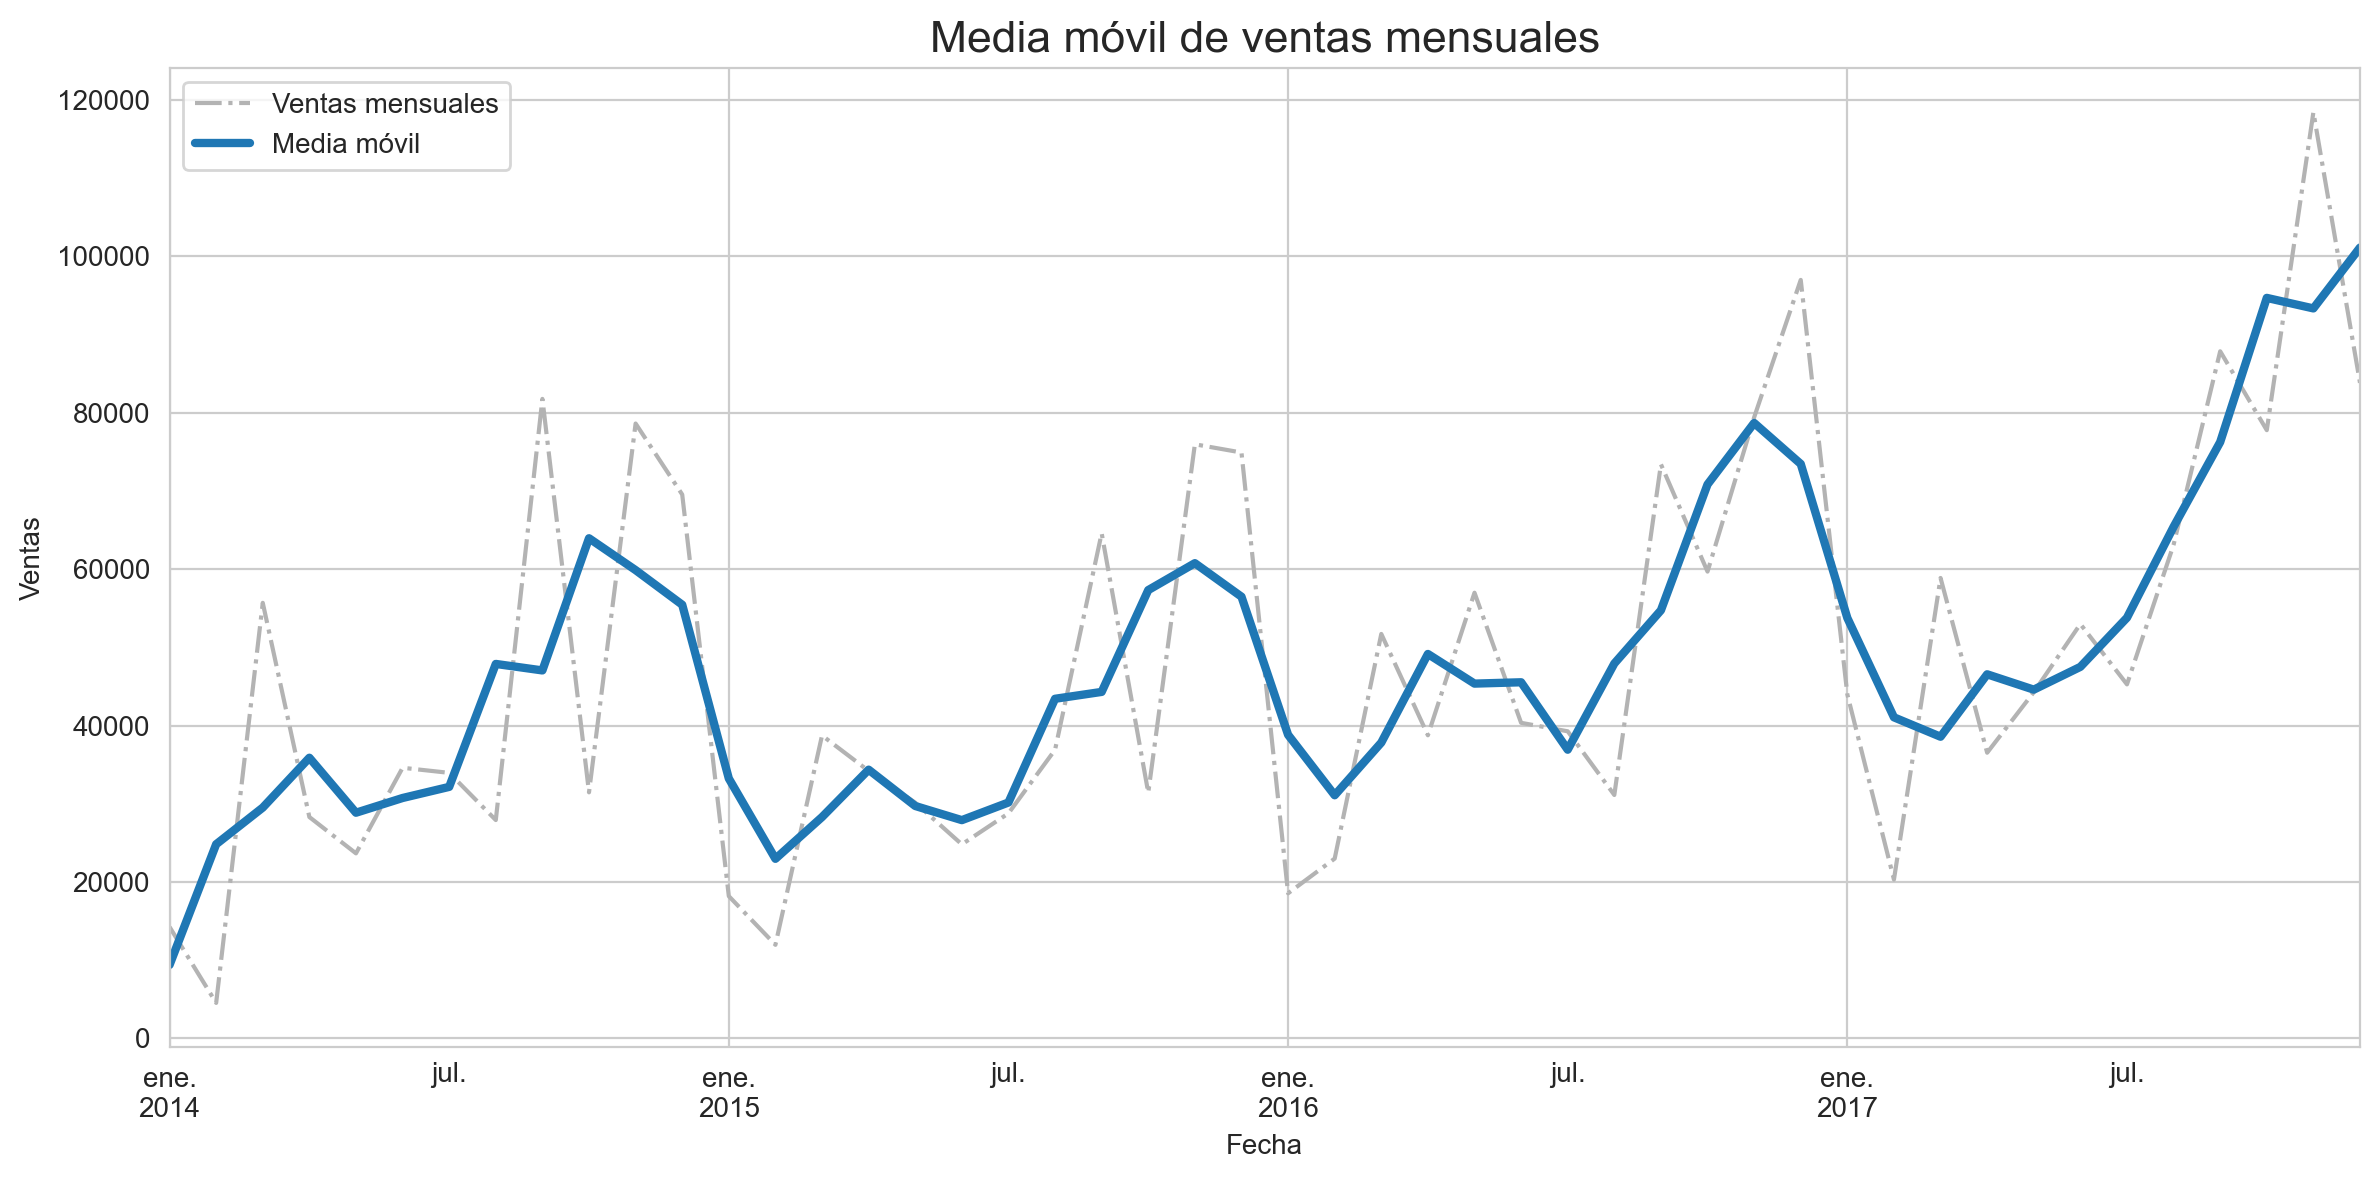

In [511]:
media_movil = ventas_por_mes['Sales'].rolling(window=3, center=True, min_periods=1).mean()

plt.figure(figsize=(12, 6))

ax = ventas_por_mes['Sales'].plot(style="-.", color="0.7", label='Ventas mensuales')

media_movil.plot(ax=ax, linewidth=3, label='Media móvil')

plt.title('Media móvil de ventas mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()

plt.show()

In [517]:
ventana = 3
horizonte = 7

rango_pronostico = pd.date_range(start=ventas_por_mes.index[-1] + pd.DateOffset(months=1), periods=horizonte, freq='MS')

ventana_movil = ventas_por_mes["Sales"][-ventana:].values

pronosticos = []

for t in range(horizonte):
    pronostico = ventana_movil.mean()
    pronosticos.append(pronostico)
    ventana_movil = np.append(ventana_movil[1:], pronostico)

for fecha_pronostico, pronostico in zip(rango_pronostico, pronosticos):
    print('Fecha: {}, Pronóstico: {:.2f}'.format(fecha_pronostico.strftime('%m-%Y'), pronostico))

Fecha: 01-2018, Pronóstico: 93351.36
Fecha: 02-2018, Pronóstico: 98542.83
Fecha: 03-2018, Pronóstico: 91907.84
Fecha: 04-2018, Pronóstico: 94600.67
Fecha: 05-2018, Pronóstico: 95017.11
Fecha: 06-2018, Pronóstico: 93841.88
Fecha: 07-2018, Pronóstico: 94486.55


#### Por día

In [518]:
ventana = 3
horizonte = 7

rango_pronostico = pd.date_range(start=ventas_por_dia.index[-1] + pd.DateOffset(days=1), periods=horizonte)
ventana_movil = ventas_por_dia["Sales"][-ventana:].values
pronosticos = []

for t in range(horizonte):
    pronostico = ventana_movil.mean()
    pronosticos.append(pronostico)
    ventana_movil = np.append(ventana_movil[1:], pronostico)
for fecha_pronostico, pronostico in zip(rango_pronostico, pronosticos):
    print('Fecha: {}, Pronóstico: {:.2f}'.format(fecha_pronostico.strftime('%d-%m-%Y'), pronostico))

Fecha: 31-12-2017, Pronóstico: 1762.22
Fecha: 01-01-2018, Pronóstico: 1797.18
Fecha: 02-01-2018, Pronóstico: 1424.40
Fecha: 03-01-2018, Pronóstico: 1661.27
Fecha: 04-01-2018, Pronóstico: 1627.62
Fecha: 05-01-2018, Pronóstico: 1571.10
Fecha: 06-01-2018, Pronóstico: 1619.99


## Metodo 2: Suavizado Exponencial

In [17]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [18]:
horizonte = 7

In [503]:
ultimo_indice_tiempo = ventas_por_dia.index[-1]  # Último índice de tiempo en los datos originales
rango_pronostico = pd.date_range(start=ultimo_indice_tiempo, periods=horizonte+1, freq=ventas_por_dia.index.freq)[1:]

### Suavizado exponencial por día

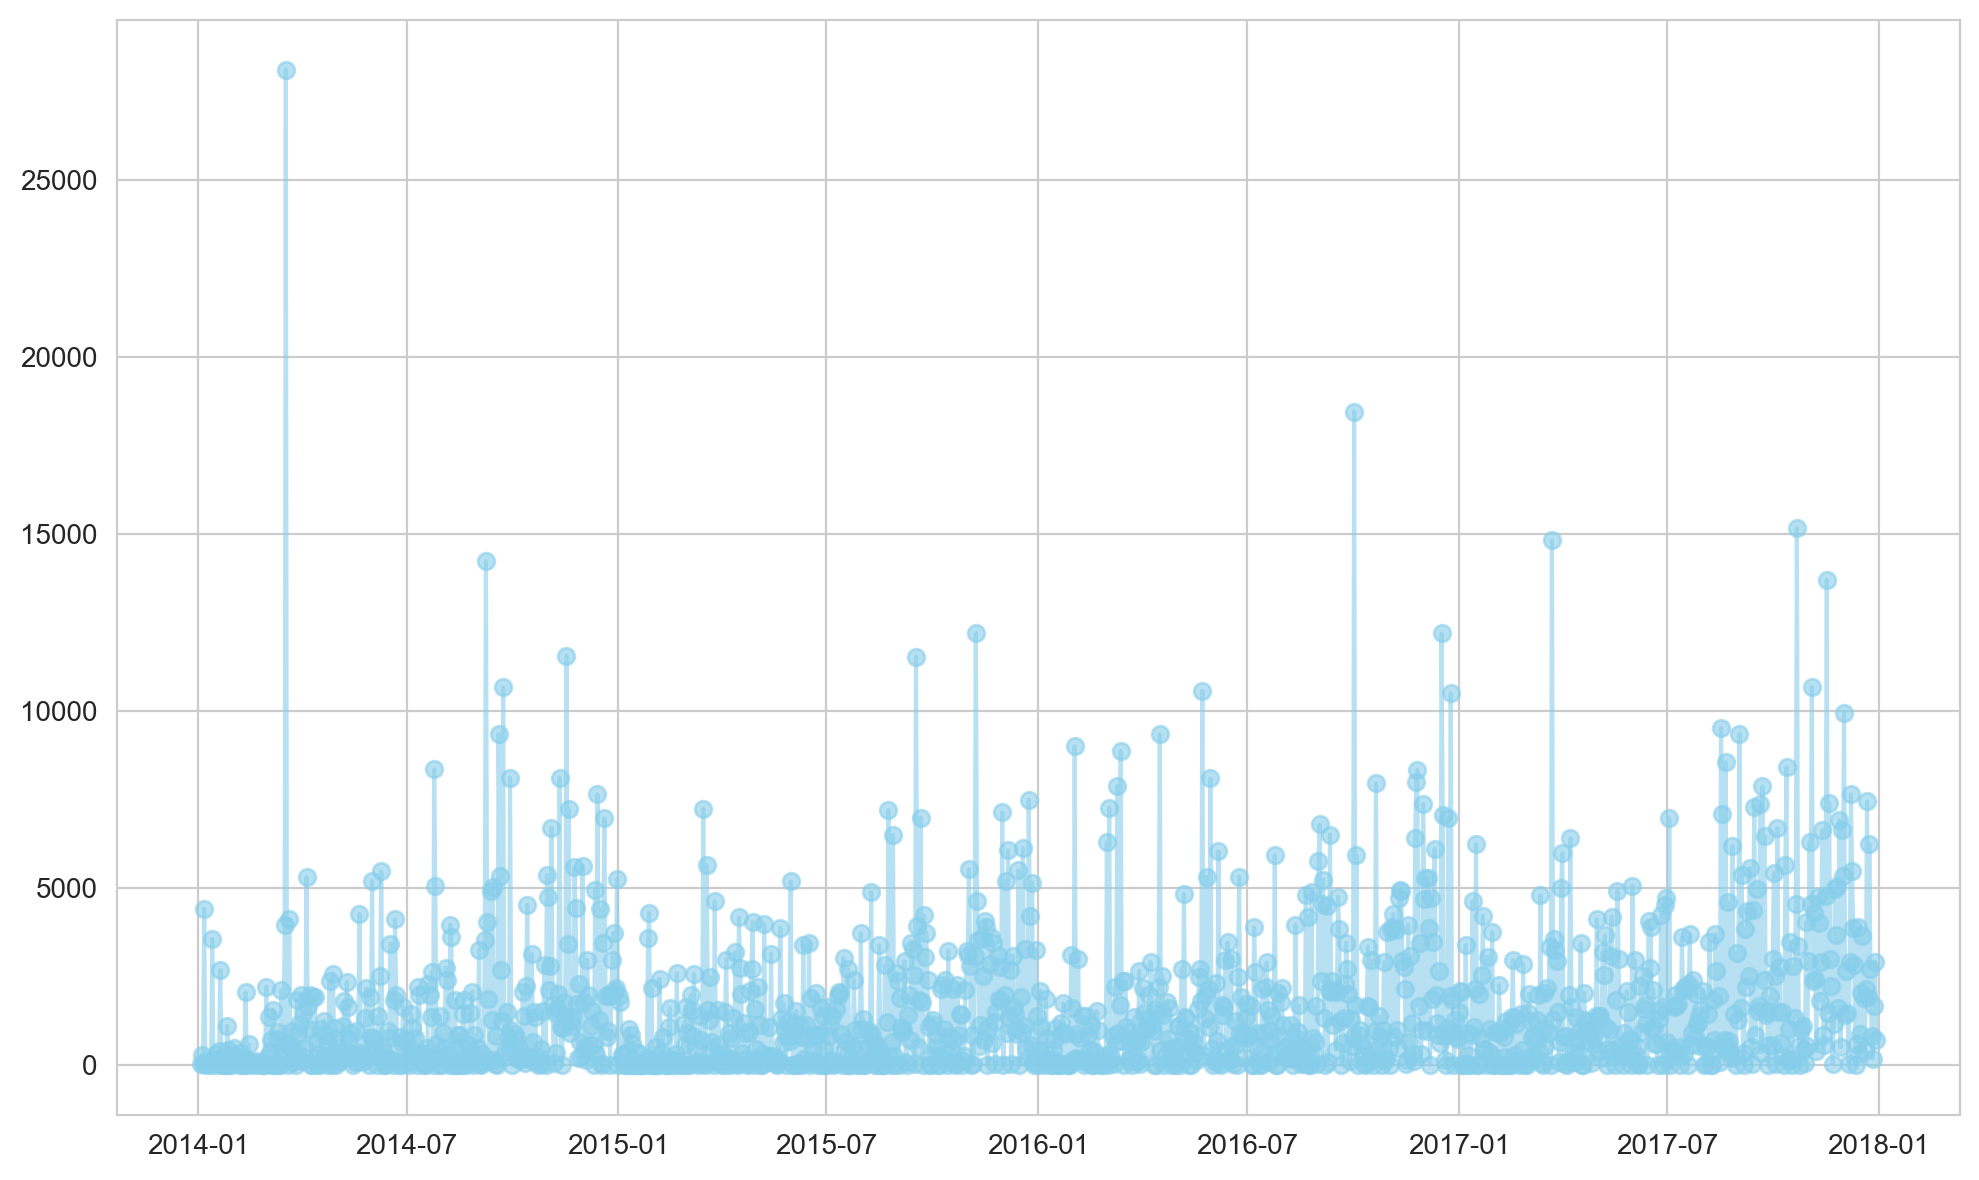

In [505]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ventas_por_dia.index, ventas_por_dia["Sales"], color="skyblue", alpha=0.6, marker="o")
plt.show()

In [506]:
ses = SimpleExpSmoothing(ventas_por_dia["Sales"])
model = ses.fit()
forecast = model.forecast(horizonte)

print("Factor de suavizacion (alfa) =", model.params["smoothing_level"])
print("Nivel inicial (1_0) = ", model.params["initial_level"])
print("Pronostico (y_{T+h|T}) = ", model.forecast(horizonte)[0])

Factor de suavizacion (alfa) = 0.03953488372093023
Nivel inicial (1_0) =  16.448
Pronostico (y_{T+h|T}) =  2836.3406612133026


c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [507]:
forecast.round()

2017-12-31    2836.0
2018-01-01    2836.0
2018-01-02    2836.0
2018-01-03    2836.0
2018-01-04    2836.0
2018-01-05    2836.0
2018-01-06    2836.0
Freq: D, dtype: float64

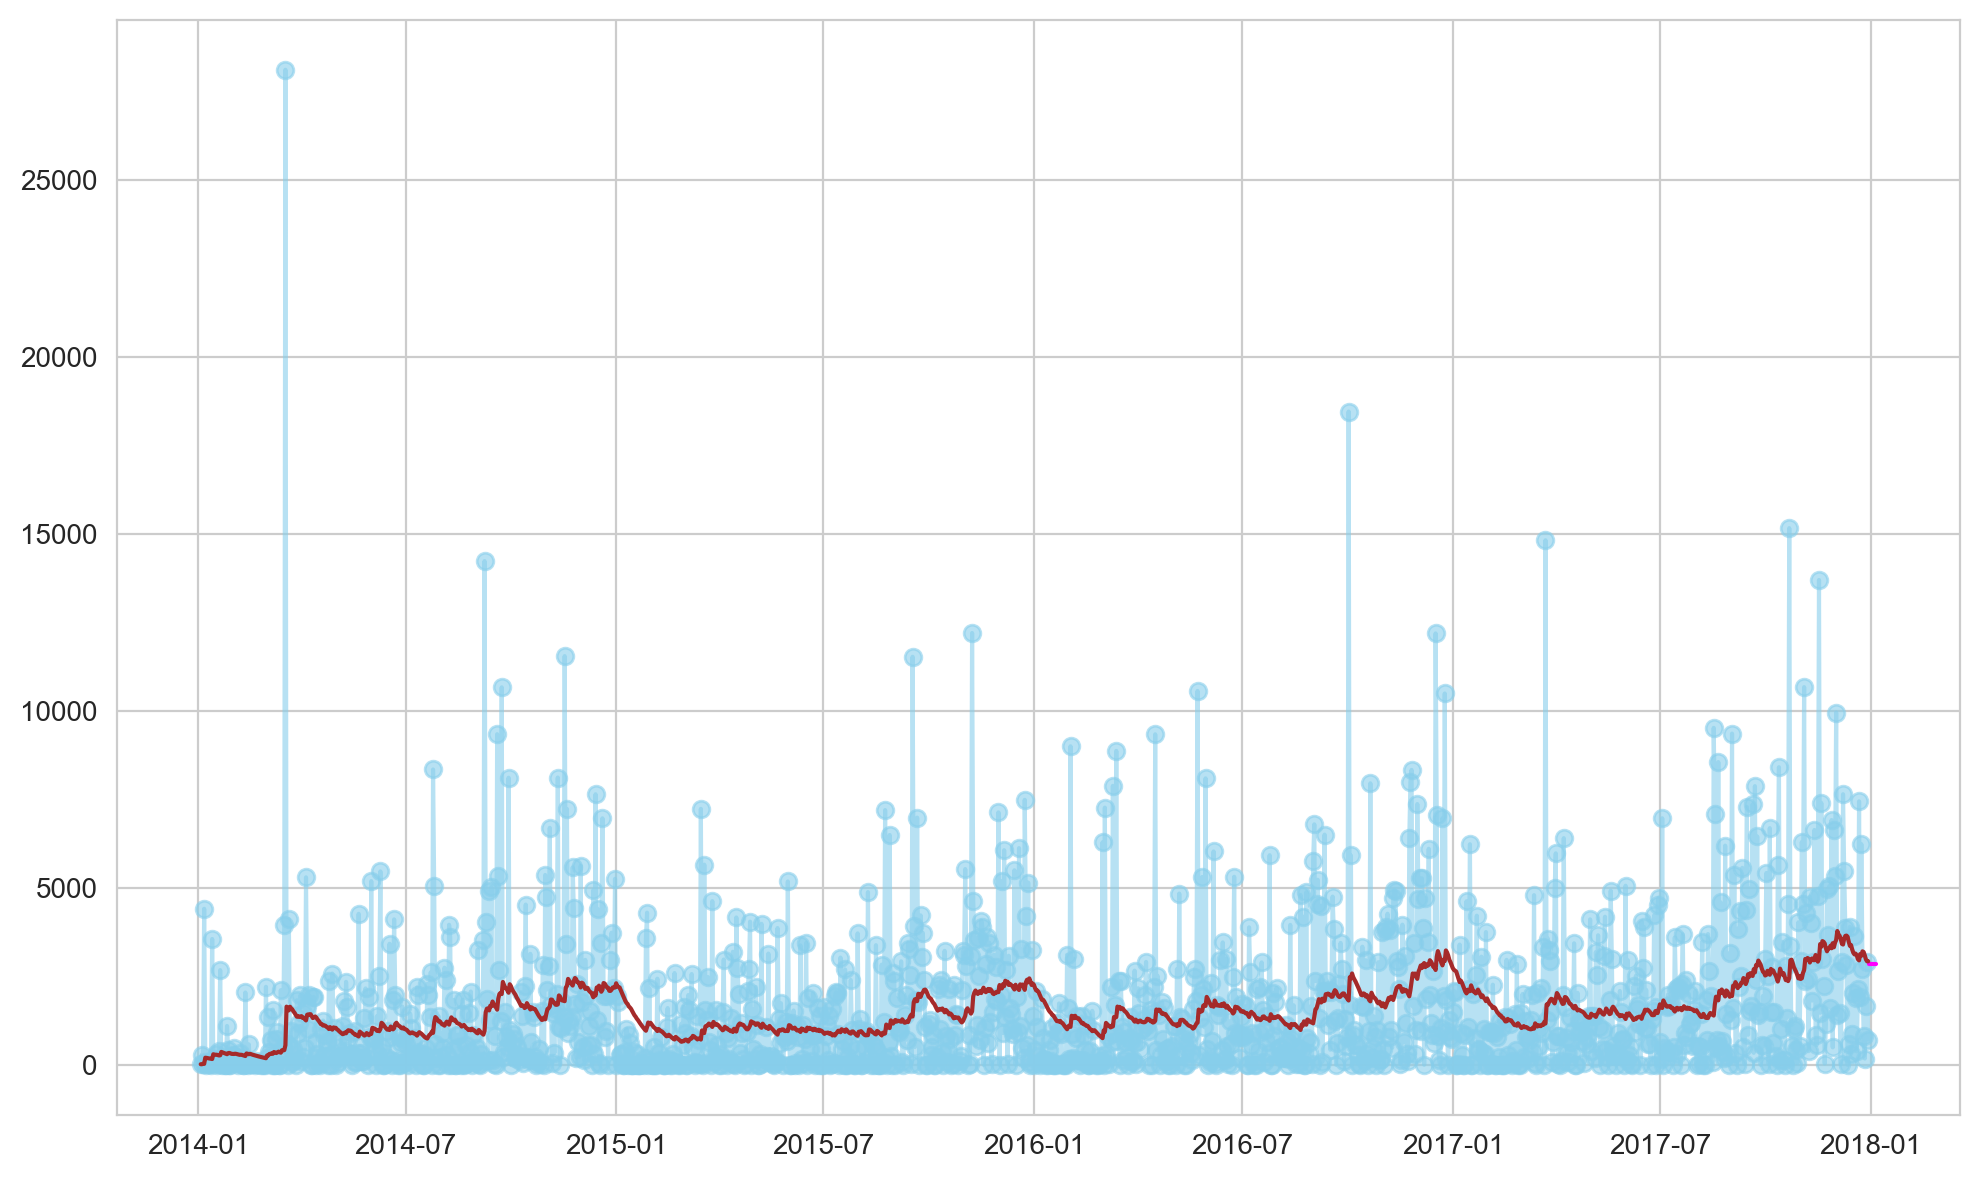

In [508]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ventas_por_dia.index, ventas_por_dia["Sales"], color="skyblue", alpha=0.6, marker="o")
ax.plot(rango_pronostico, forecast, color="magenta")

ax.plot(ventas_por_dia.index, model.fittedvalues, color="brown")

plt.show()

### Suavizado exponencial por mes

In [25]:
horizonte = 7

In [26]:
ultimo_indice_tiempo = ventas_por_mes.index[-1]  # Último índice de tiempo en los datos originales
rango_pronostico = pd.date_range(start=ultimo_indice_tiempo, periods=horizonte+1, freq=ventas_por_mes.index.freq)[1:]

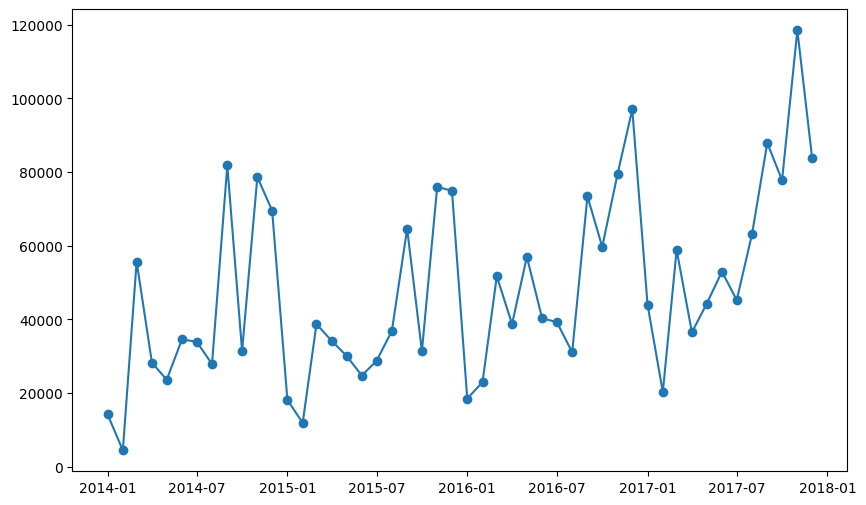

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ventas_por_mes.index, ventas_por_mes["Sales"], marker="o")
plt.show()

In [28]:
ses = SimpleExpSmoothing(ventas_por_mes["Sales"])
model = ses.fit()
forecast = model.forecast(horizonte)

print("Factor de suavizacion (alfa) =", model.params["smoothing_level"])
print("Nivel inicial (1_0) = ", model.params["initial_level"])
print("Pronostico (y_{T+h|T}) = ", model.forecast(horizonte)[0])

Factor de suavizacion (alfa) = 0.32732558139534884
Nivel inicial (1_0) =  14236.895
Pronostico (y_{T+h|T}) =  84558.21083930897


c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [29]:
forecast

2018-01-01    84558.210839
2018-02-01    84558.210839
2018-03-01    84558.210839
2018-04-01    84558.210839
2018-05-01    84558.210839
2018-06-01    84558.210839
2018-07-01    84558.210839
Freq: MS, dtype: float64

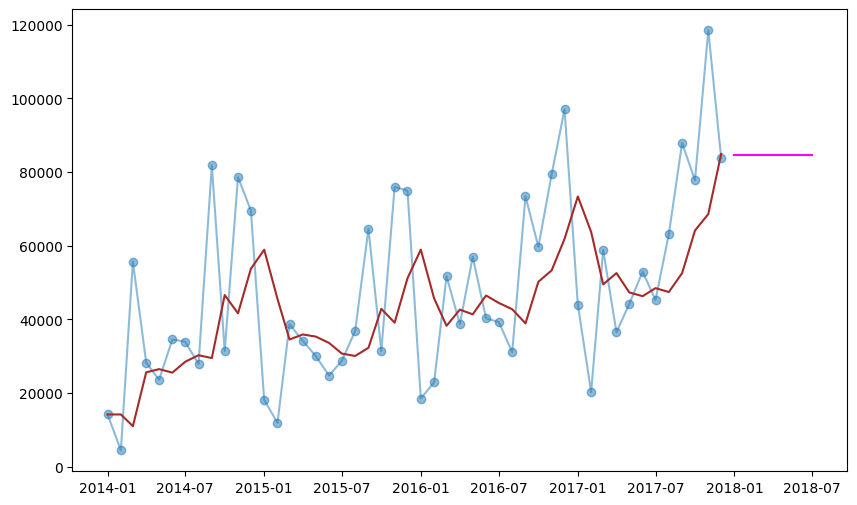

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ventas_por_mes.index, ventas_por_mes["Sales"], marker="o", alpha=0.5)
ax.plot(rango_pronostico, forecast, color="magenta")
ax.plot(ventas_por_mes.index, model.fittedvalues, color="brown")

plt.show()

## ¿Es estacionaria?

### Metodo 1: determinar la estacionalidad con la media y la varianza

In [493]:
ventas_mes = df.groupby('month')['Sales'].sum()
ventas_mes = pd.DataFrame(ventas_mes)

In [494]:
train, test, validate = np.split(ventas_mes['Sales'].sample(frac=1), [int(.6*len(ventas_mes['Sales'])),int(.8*len(ventas_mes['Sales']))])

In [484]:
print('Train Dataset')
print(train)

Train Dataset
month
2017-04     36521.5361
2017-09     87866.6520
2015-04     34195.2085
2016-01     18542.4910
2015-12     74919.5212
2015-10     31404.9235
2015-11     75972.5635
2016-08     31115.3743
2016-03     51715.8750
2014-04     28295.3450
2014-01     14236.8950
2016-07     39261.9630
2014-12     69545.6205
2014-10     31453.3930
2017-10     77776.9232
2017-01     43971.3740
2016-10     59687.7450
2016-09     73410.0249
2015-01     18174.0756
2017-02     20301.1334
2014-11     78628.7167
2017-06     52981.7257
2014-02      4519.8920
2016-05     56987.7280
2015-08     36898.3322
2016-12     96999.0430
2015-09     64595.9180
2017-11    118447.8250
Freq: M, Name: Sales, dtype: float64


In [485]:
print('Test Dataset')
print(test)

Test Dataset
month
2017-07    45264.4160
2014-09    81777.3508
2017-05    44261.1102
2014-03    55691.0090
2016-04    38750.0390
2014-06    34595.1276
2015-07    28765.3250
2015-03    38726.2520
2017-12    83829.3188
2015-05    30131.6865
Freq: M, Name: Sales, dtype: float64


In [486]:
print('Validate Dataset')
print(validate)

Validate Dataset
month
2017-03    58872.3528
2016-06    40344.5340
2015-02    11951.4110
2016-02    22978.8150
2015-06    24797.2920
2014-07    33946.3930
2017-08    63120.8880
2014-05    23648.2870
2014-08    27909.4685
2016-11    79411.9658
Freq: M, Name: Sales, dtype: float64


In [487]:
media_1, media_2, media_3 = train.mean(), test.mean(), validate.mean()
var_1, var_2, var_3 = train.var(), test.var(), validate.var()

print('Media:')
print(media_1, media_2, media_3)
print('Varianza:')
print(var_1, var_2, var_3)

Media:
51015.279225000006 48179.16349 38698.14071
Varianza:
777316144.492114 393938554.1768554 464998508.86998504


### Metodo 2: Test Dicky Fuller

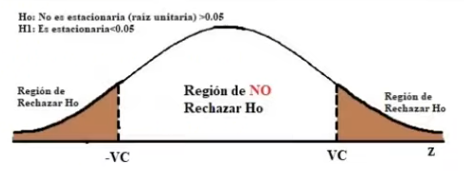

In [492]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(ventas_mes) 

print(adf)
print('\nADF = ', str(adf[0]))
print('\nValor-p = ', str(adf[1]))
print('\nValores críticos: ')

for key, val in adf[4].items():
    print(key,':',val)
    if adf[1] < 0.05:
        print('\nHipótesis Nula Rechazada. La Serie Temporal es Estacionaria')
    else:
        print('\nHipótesis Nula Aceptada. La Serie Temporal no es Estacionaria')

(-4.493767844002668, 0.00020180198458237563, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 848.774903223632)

ADF =  -4.493767844002668

Valor-p =  0.00020180198458237563

Valores críticos: 
1% : -3.5778480370438146

Hipótesis Nula Rechazada. La Serie Temporal es Estacionaria
5% : -2.925338105429433

Hipótesis Nula Rechazada. La Serie Temporal es Estacionaria
10% : -2.6007735310095064

Hipótesis Nula Rechazada. La Serie Temporal es Estacionaria


### Metodo 3: Descomposicion estacional

In [38]:
from statsmodels.tsa.seasonal import STL

In [39]:
ventas_por_mes_sin_indice = ventas_por_mes.drop('time', axis=1)

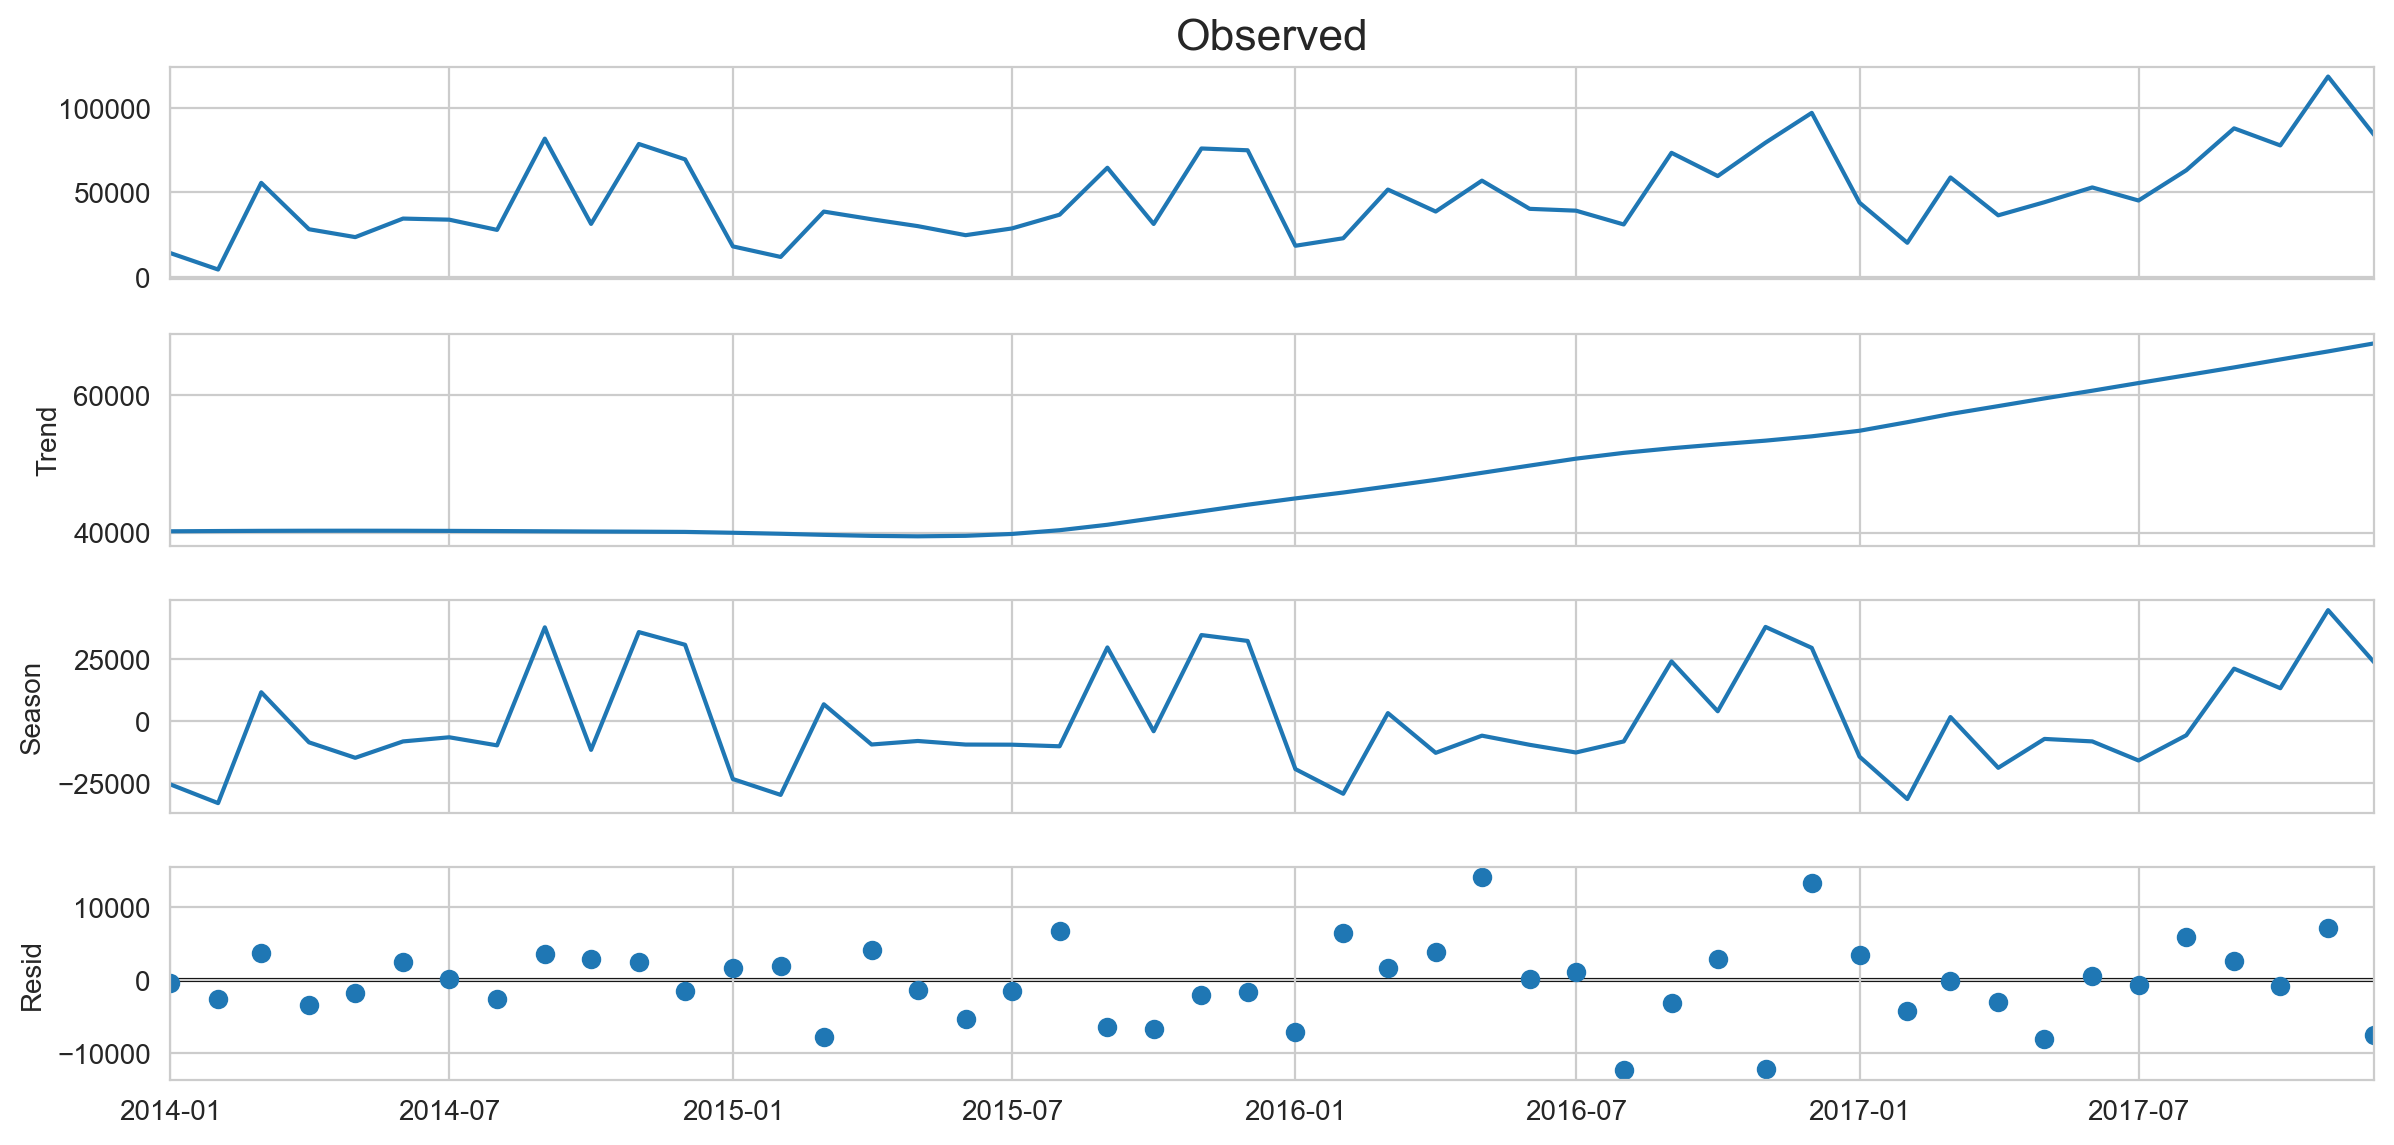

In [466]:
ventas_STL = STL(ventas_por_mes_sin_indice).fit()
fig = ventas_STL.plot()
fig.set_size_inches((12,6))
plt.show()

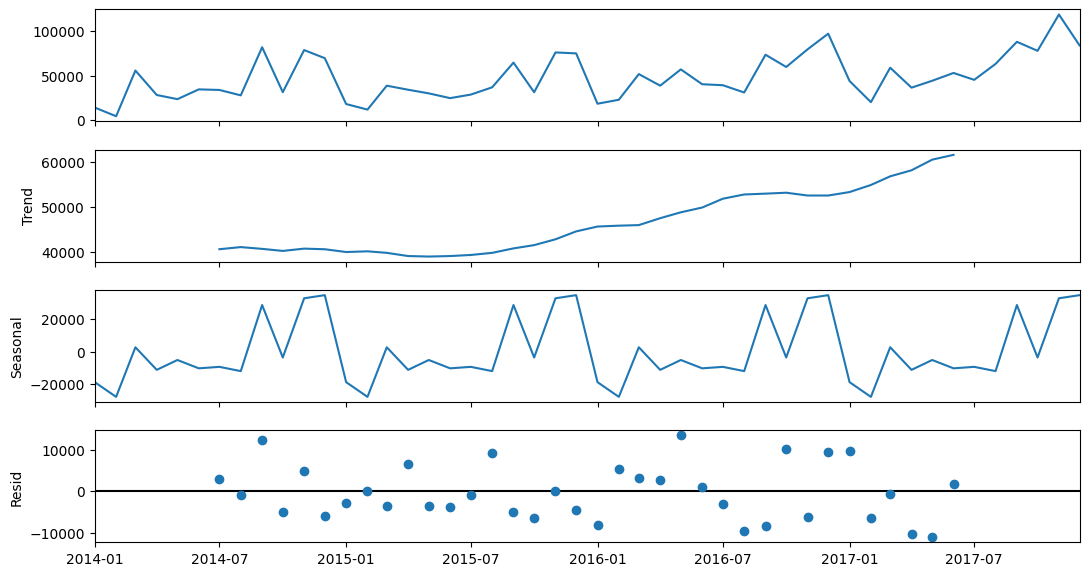

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

ventas_aditiva = seasonal_decompose(ventas_por_mes_sin_indice, model='additive')

fig = ventas_aditiva.plot()
fig.set_size_inches((12,6))
plt.show()

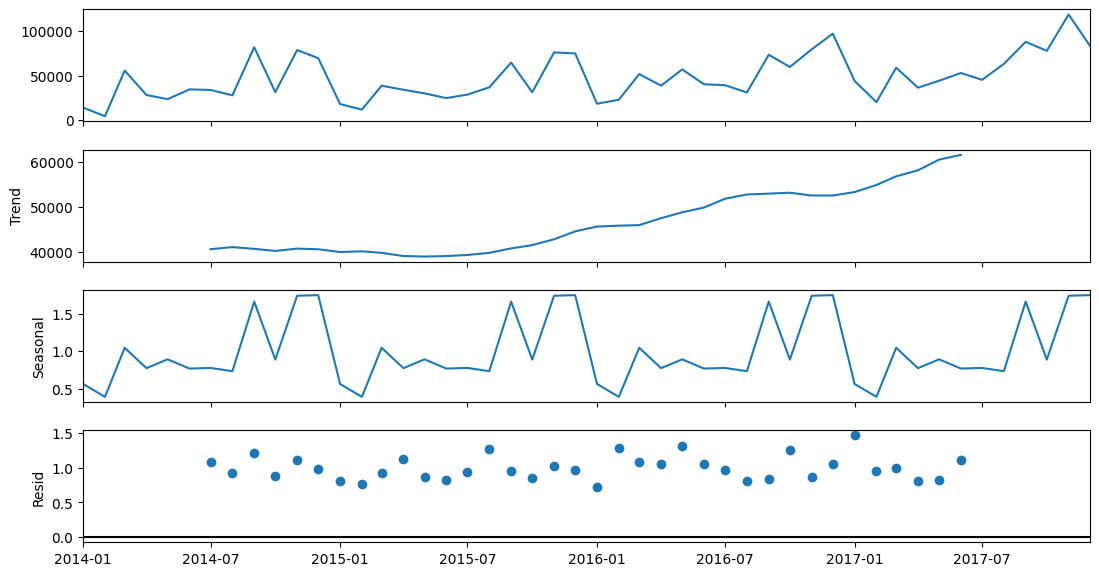

In [42]:
ventas_multiplicativa = seasonal_decompose(ventas_por_mes_sin_indice,model='multiplicative')
fig = ventas_multiplicativa.plot()
fig.set_size_inches((12,6))
plt.show()

In [43]:
print(f'Promedio residuales descomposición aditiva: {ventas_STL.resid.mean()}')
print(f'Promedio residuales descomposición aditiva: {ventas_aditiva.resid.mean()}')
print(f'Promedio residuales descomposición multiplicativa: {ventas_multiplicativa.resid.mean()}')

Promedio residuales descomposición aditiva: -206.5770537287414
Promedio residuales descomposición aditiva: -360.0099112268491
Promedio residuales descomposición multiplicativa: 0.9984552789093115


## Metodo 3: SARIMA

In [280]:
p = d = q = range(0, 2) 
pdq = [(x, y, z) for x in p for y in d for z in q]
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in pdq]
print('Ejemplos de combinaciones de parámetros para ARIMA estacional:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Ejemplos de combinaciones de parámetros para ARIMA estacional:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [437]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

best_aic = float('inf')

for parameters in pdq:
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(ventas_mes['Sales'],
                                            order=parameters,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            current_aic = results.aic
            if current_aic < best_aic:
                best_model = results
                best_aic = current_aic
                best_parameters = parameters
                best_seasonal_param = seasonal_param
        except:
            continue

print('Mejor modelo SARIMA:', best_model)
print('Parámetros del mejor modelo:', best_parameters)
print('Parámetros estacionales del mejor modelo:', best_seasonal_param)
print('AIC del mejor modelo:', best_aic)

c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\tobia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Mejor modelo SARIMA: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x00000260439DD610>
Parámetros del mejor modelo: (0, 1, 1)
Parámetros estacionales del mejor modelo: (0, 1, 1, 12)
AIC del mejor modelo: 465.50006045517824


In [453]:
mod = sm.tsa.statespace.SARIMAX(ventas_mes,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -229.750
Date:                          jue., 16 may. 2024   AIC                            465.500
Time:                                    18:08:45   BIC                            468.634
Sample:                                01-31-2014   HQIC                           466.180
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9373      0.139     -6.723      0.000      -1.211      -0.664
ma.S.L12      -0.3912      0.274   

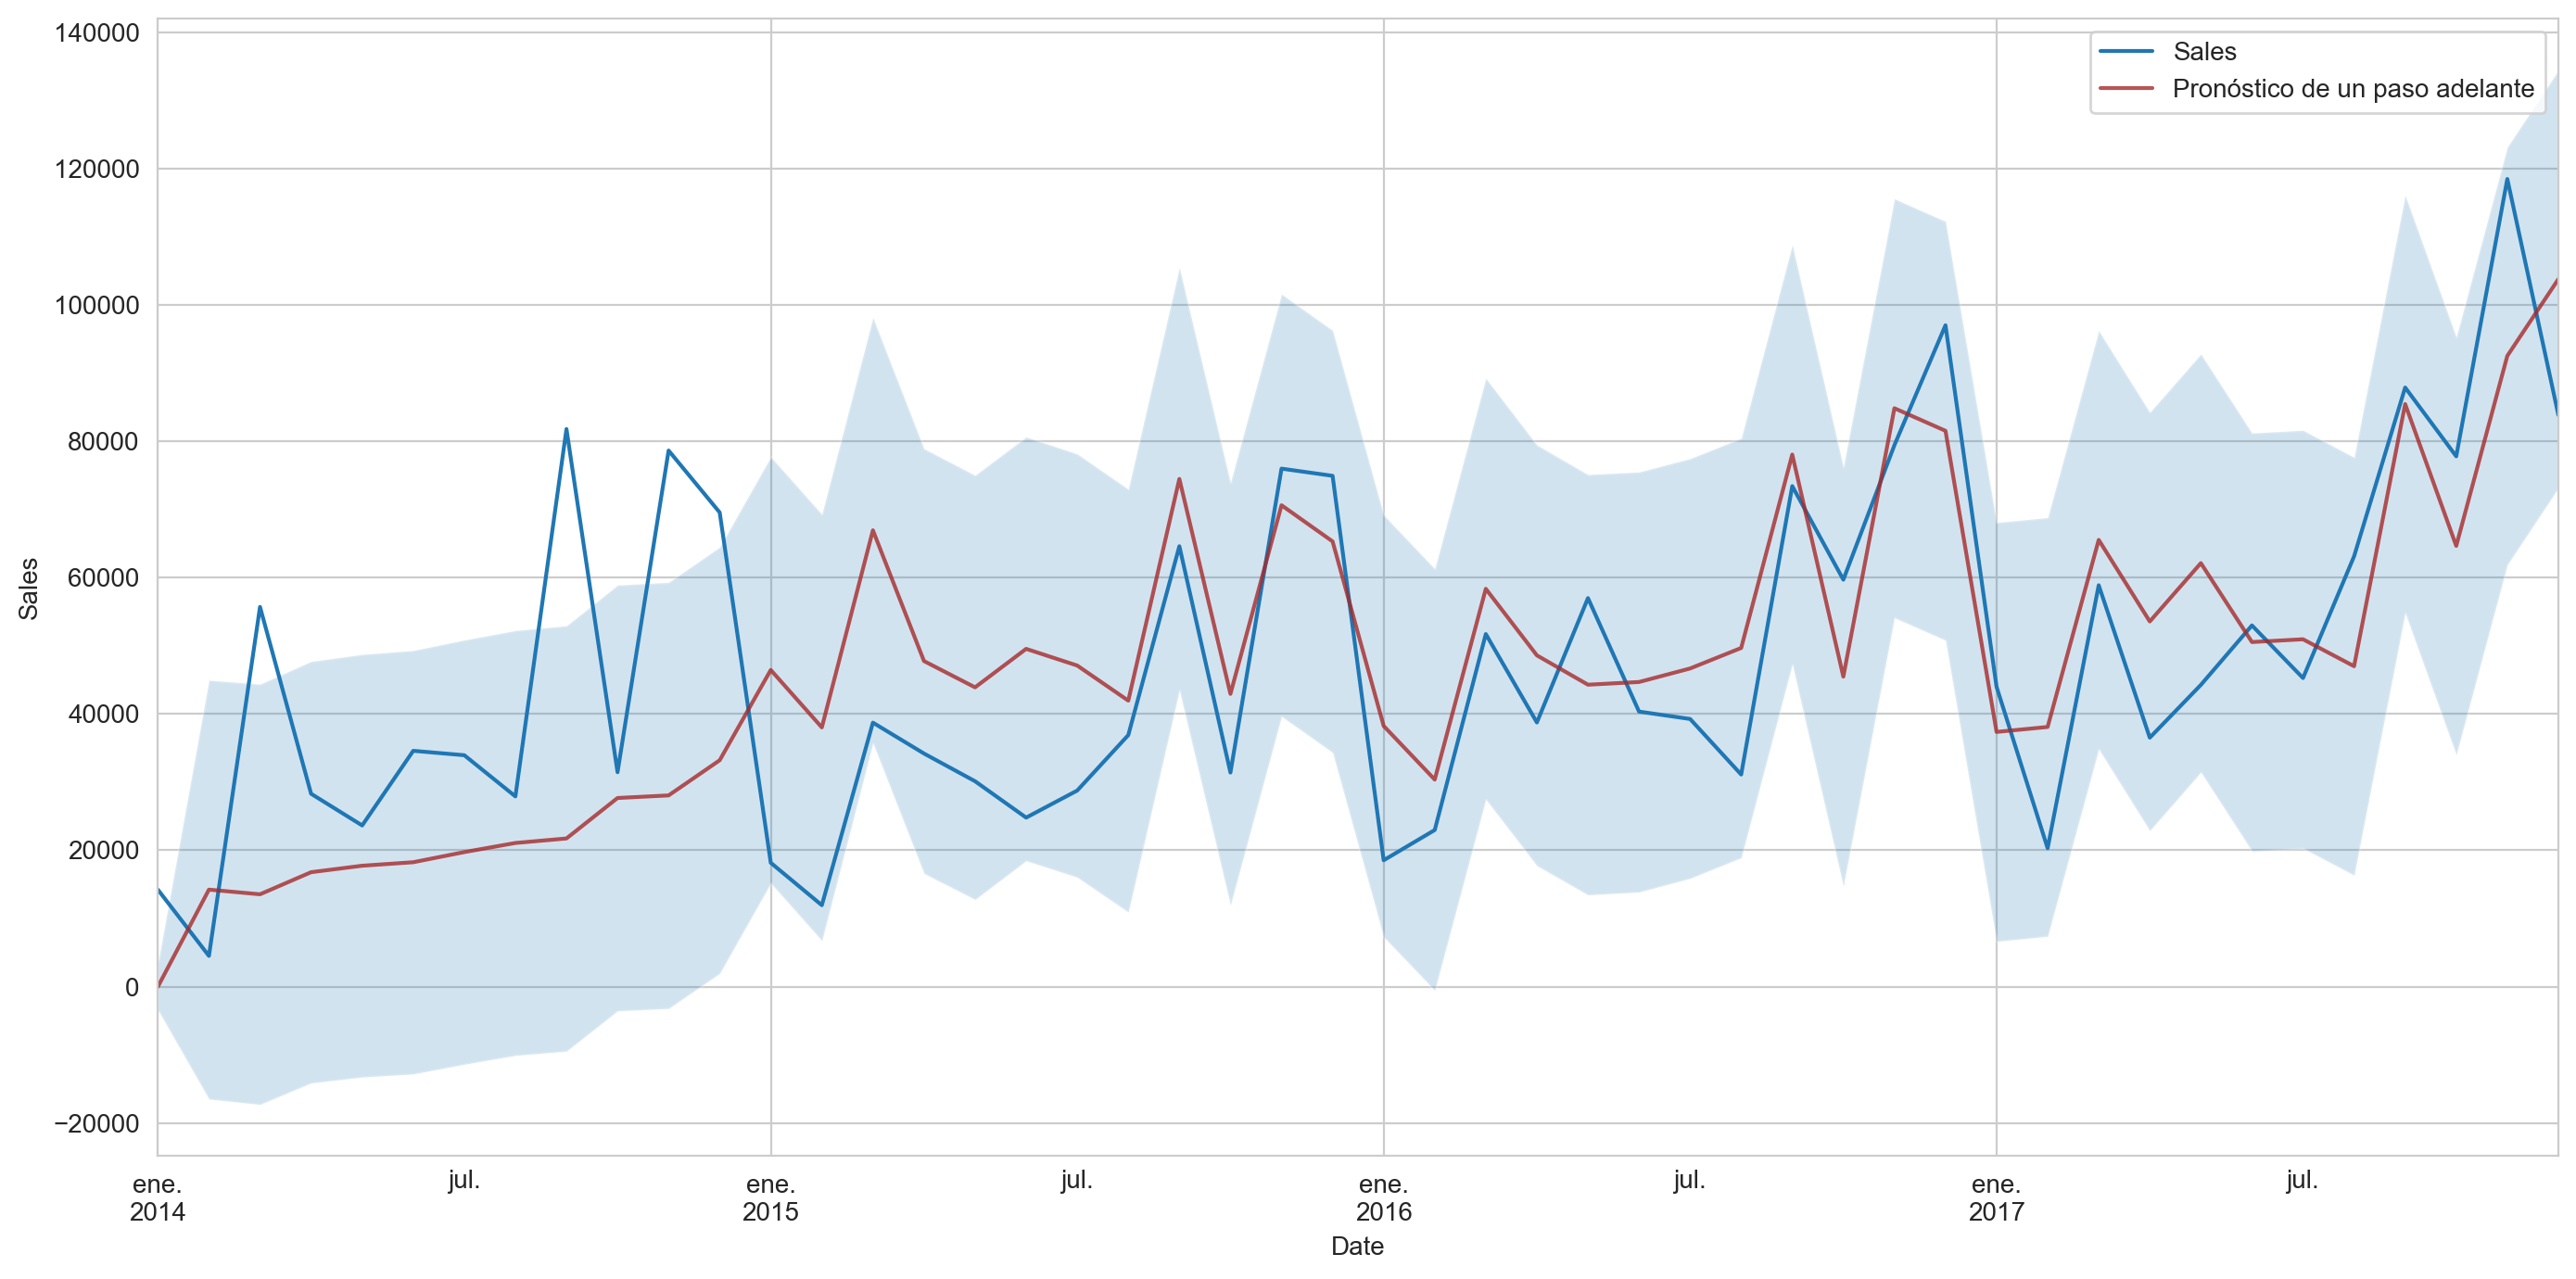

In [440]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-03'), dynamic=False)
pred_val = pred.conf_int()
ax = ventas_mes['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Pronóstico de un paso adelante', color="brown", alpha=.8, figsize=(14, 7))
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [443]:
prediccion_futura = results.get_forecast(steps=10)
print(prediccion_futura.summary_frame())

Sales            mean       mean_se  mean_ci_lower  mean_ci_upper
2018-01  52477.992383  15623.880089   21855.750110   83100.234656
2018-02  38167.151567  15655.318095    7483.291934   68851.011201
2018-03  72866.003426  15686.026221   42121.956972  103610.049879
2018-04  54758.647866  15716.696202   23954.489354   85562.806378
2018-05  63273.417245  15747.331059   32409.215517   94137.618973
2018-06  64527.960112  15777.934097   33603.777531   95452.142694
2018-07  59925.094696  15808.508961   28940.986482   90909.202909
2018-08  69399.053910  15839.059681   38355.067385  100443.040434
2018-09  99087.314489  15869.590731   67983.488207  130191.140771
2018-10  84744.269661  15900.107085   53580.632424  115907.906898


<Axes: >

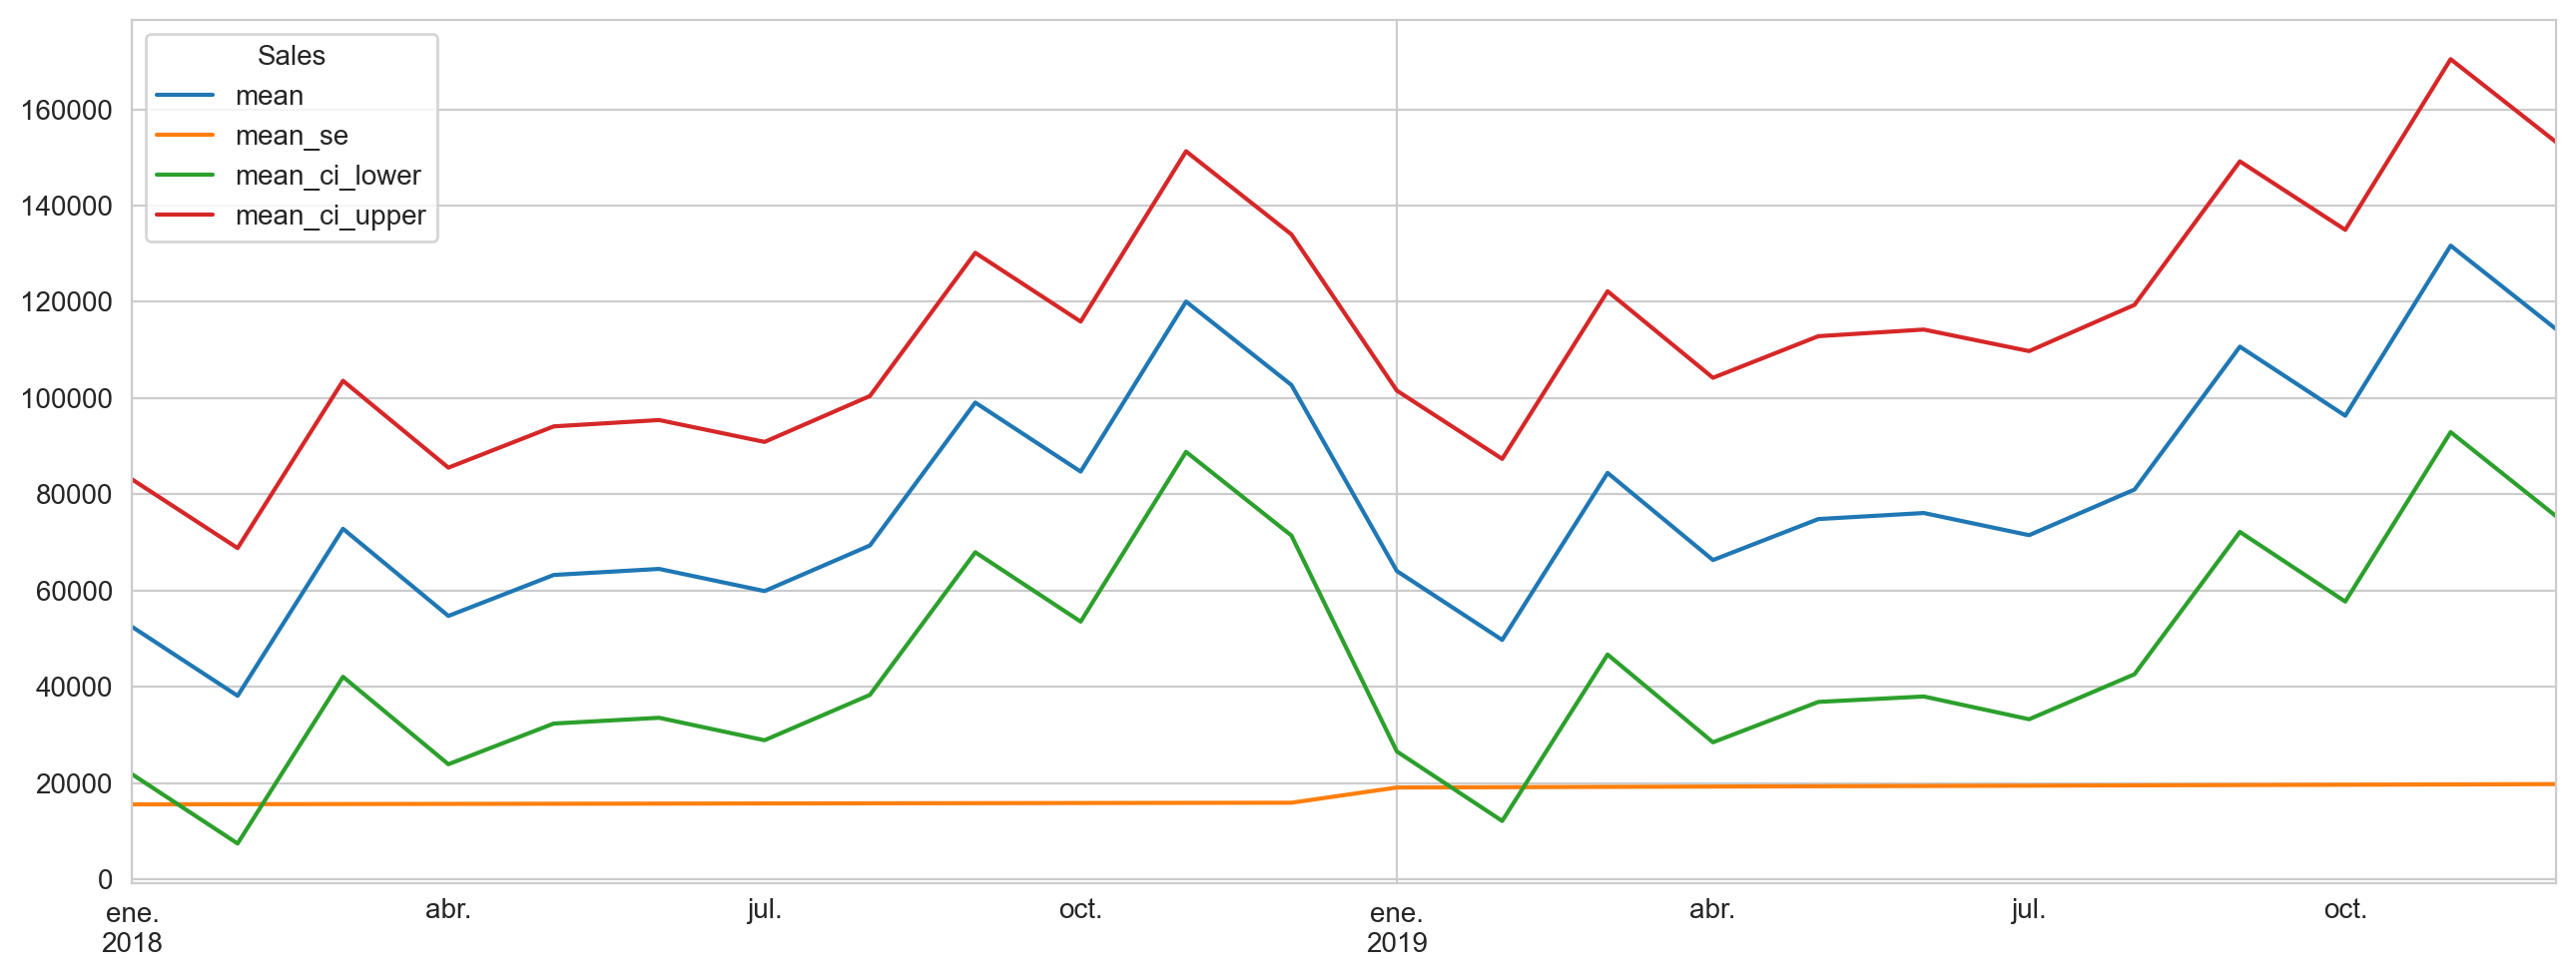

In [477]:
prediccion_futura = results.get_forecast(steps=24)
prediccion_futura.summary_frame().plot()

In [475]:
prediccion_futura.summary_frame().tail(24)

Sales             mean       mean_se  mean_ci_lower  mean_ci_upper
2018-01   52477.992383  15623.880089   21855.750110   83100.234656
2018-02   38167.151567  15655.318095    7483.291934   68851.011201
2018-03   72866.003426  15686.026221   42121.956972  103610.049879
2018-04   54758.647866  15716.696202   23954.489354   85562.806378
2018-05   63273.417245  15747.331059   32409.215517   94137.618973
2018-06   64527.960112  15777.934097   33603.777531   95452.142694
2018-07   59925.094696  15808.508961   28940.986482   90909.202909
2018-08   69399.053910  15839.059681   38355.067385  100443.040434
2018-09   99087.314489  15869.590731   67983.488207  130191.140771
2018-10   84744.269661  15900.107085   53580.632424  115907.906898
2018-11  120067.164175  15930.614283   88843.733928  151290.594422
2018-12  102733.858232  15961.118503   71450.640813  134017.075650
2019-01   64090.682280  19121.077487   26614.059060  101567.305500
2019-02   49779.841464  19186.944816   12174.120652   87385.562276
2019-03   84478.693322  19251.622610   46746.206364  122211.180281
2019-04   66371.337763  19316.113652   28512.450684  104230.224841
2019-05   74886.107142  19380.423412   36901.175249  112871.039035
2019-06   76140.650009  19444.557729   38030.017164  114251.282854
2019-07   71537.784592  19508.522868   33301.782380  109773.786804
2019-08   81011.743807  19572.325581   42650.690574  119372.797039
2019-09  110700.004386  19635.973181   72214.204150  149185.804621
2019-10   96356.959558  19699.473610   57746.700768  134967.218347
2019-11  131679.854072  19762.835526   92945.408207  170414.299936
2019-12  114346.548128  19826.068394   75488.168120  153204.928136

In [460]:
y_forecasted = pred.predicted_mean
y_truth = ventas_mes['Sales']

<Axes: xlabel='month'>

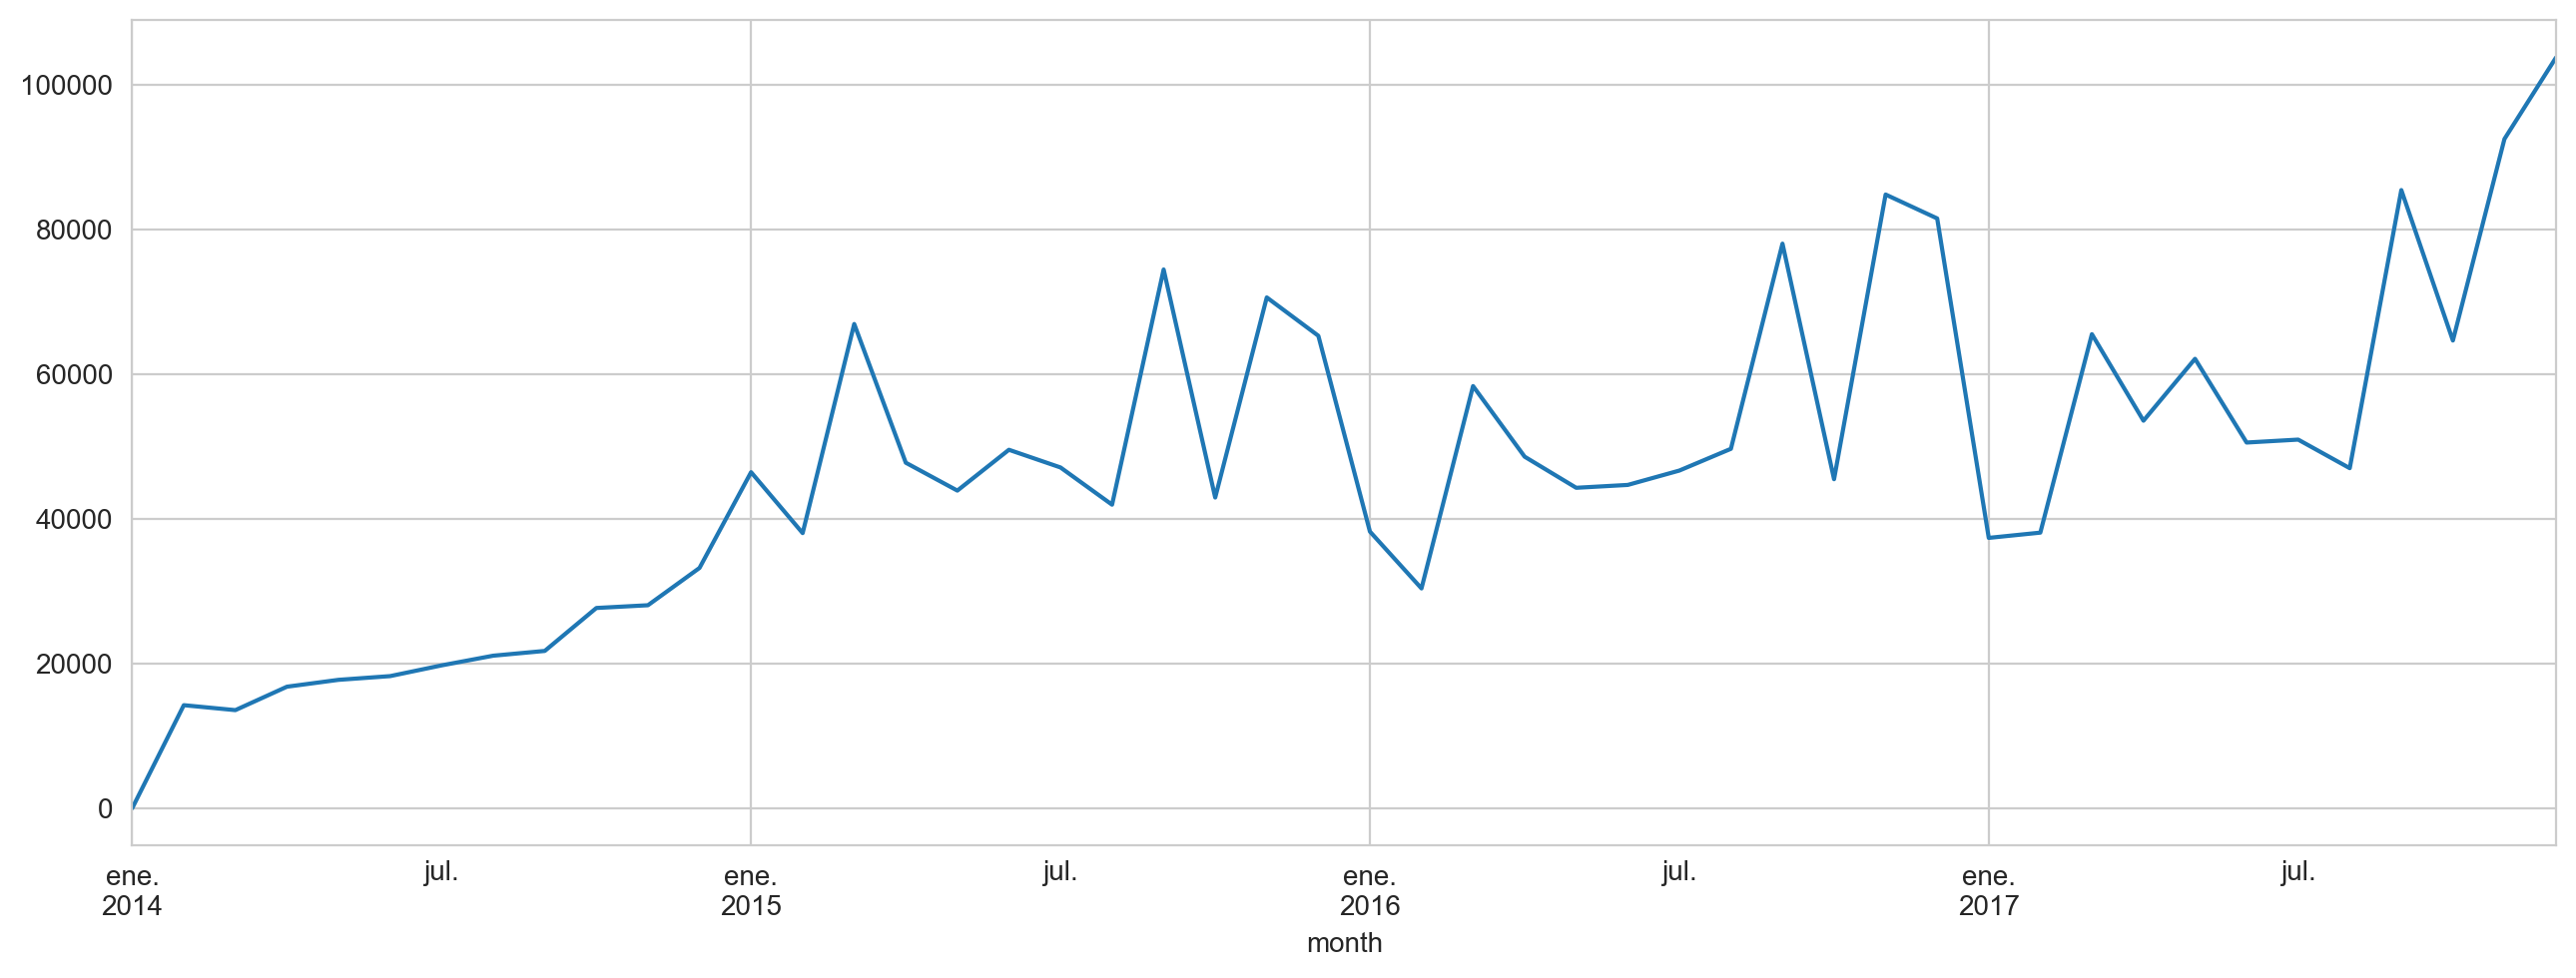

In [458]:
y_forecasted.plot()

In [462]:
from math import sqrt

r2 = r2_score(y_forecasted, y_truth)
mae = mean_absolute_error(y_forecasted, y_truth)
mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_forecasted, y_truth)
medae = median_absolute_error(y_forecasted, y_truth)
me = max_error(y_forecasted, y_truth)
evs = explained_variance_score(y_forecasted, y_truth)
mpl = mean_pinball_loss(y_forecasted, y_truth)
d2t = d2_tweedie_score(y_forecasted, y_truth)
d2p = d2_pinball_score(y_forecasted, y_truth)

print("R2 Score (Coeficiente de determinación): {:.2f}".format(r2))
print("Error Absoluto Medio (MAE): {:.2f}".format(mae))
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse))
print("Raíz del Error Cuadrático Medio (RMSE): {:.2f}".format(rmse))
print("Error Porcentual Absoluto Medio (MAPE): {:.2f}".format(mape))
print("Error Absoluto Mediano (MEDAE): {:.2f}".format(medae))
print("Error Máximo (ME): {:.2f}".format(me))
print("Varianza Explicada (EVS): {:.2f}".format(evs))
print("Pérdida Media de Pinball (MPL): {:.2f}".format(mpl))
print("Puntuación Tweedie D^2 (D2T): {:.2f}".format(d2t))
print("Puntuación de Pinball D^2 (D2P): {:.2f}".format(d2p))

R2 Score (Coeficiente de determinación): 0.24
Error Absoluto Medio (MAE): 15498.95
Error Cuadrático Medio (MSE): 384216004.96
Raíz del Error Cuadrático Medio (RMSE): 19601.43
Error Porcentual Absoluto Medio (MAPE): 1335776562852351744.00
Error Absoluto Mediano (MEDAE): 13347.75
Error Máximo (ME): 60037.84
Varianza Explicada (EVS): 0.24
Pérdida Media de Pinball (MPL): 7749.48
Puntuación Tweedie D^2 (D2T): 0.24
Puntuación de Pinball D^2 (D2P): 0.09


## Metodo 4: Regresion lineal

### Regresion lineal: primera manera

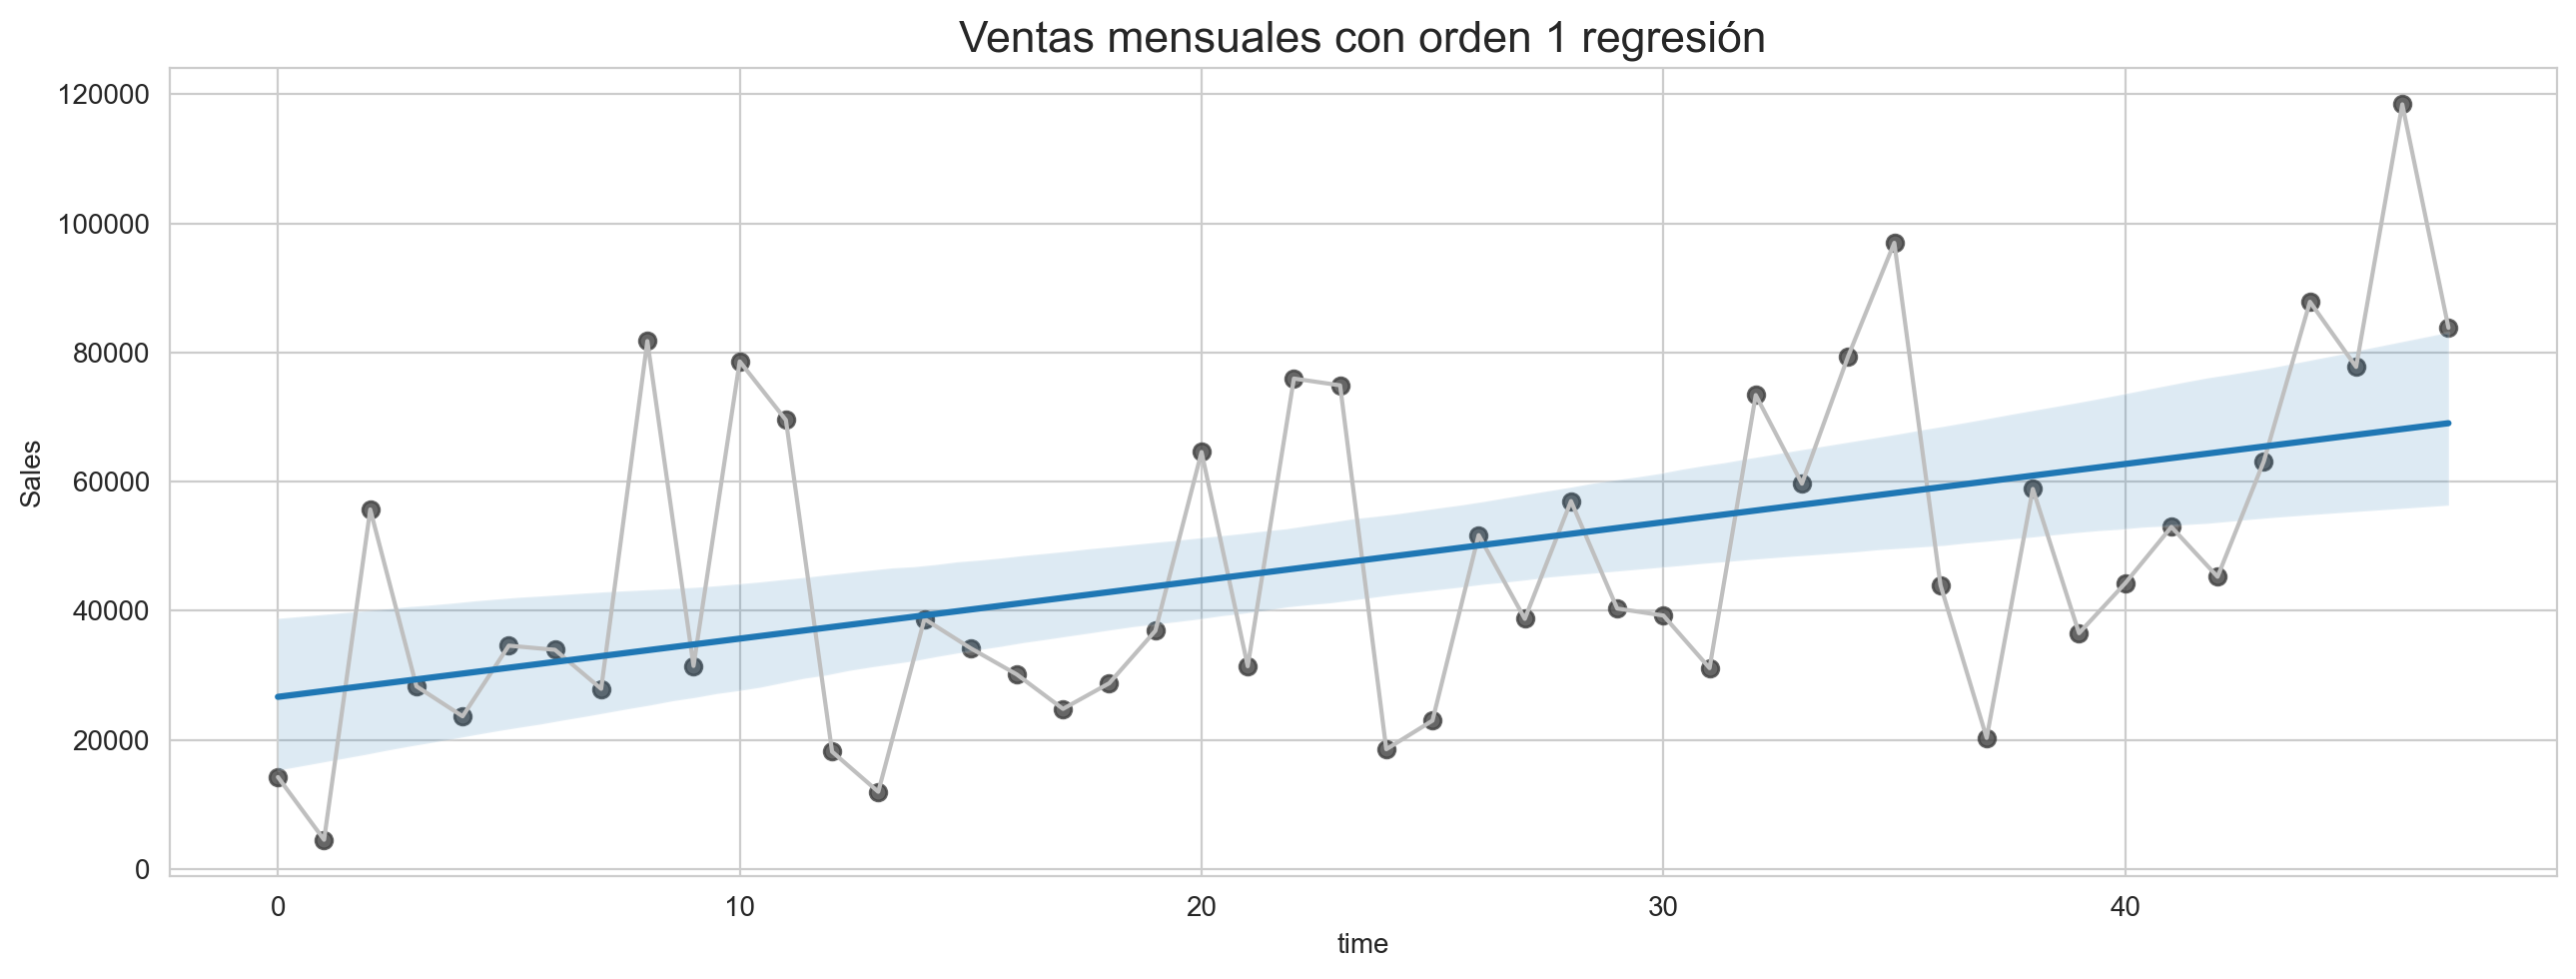

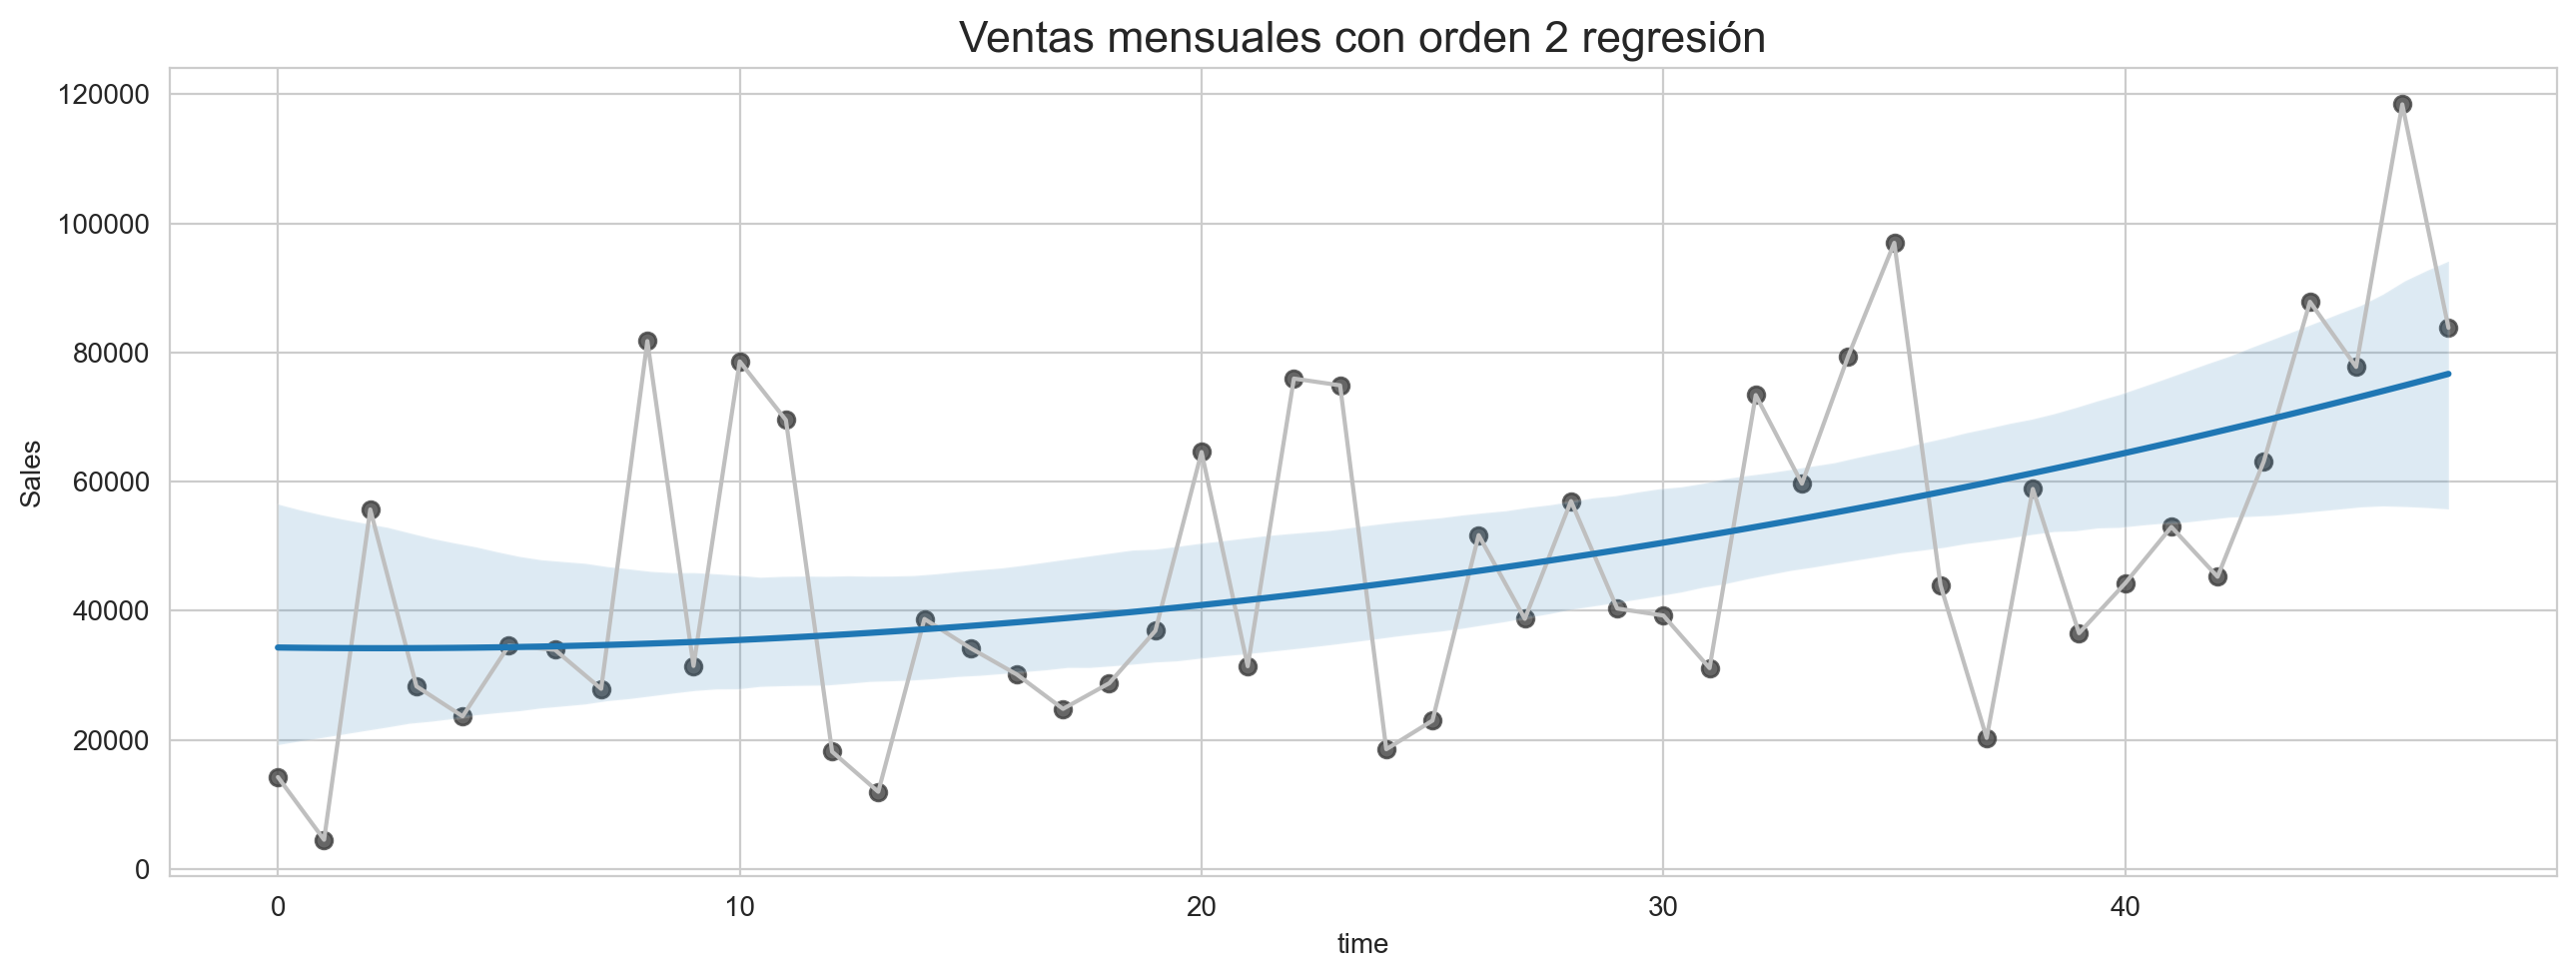

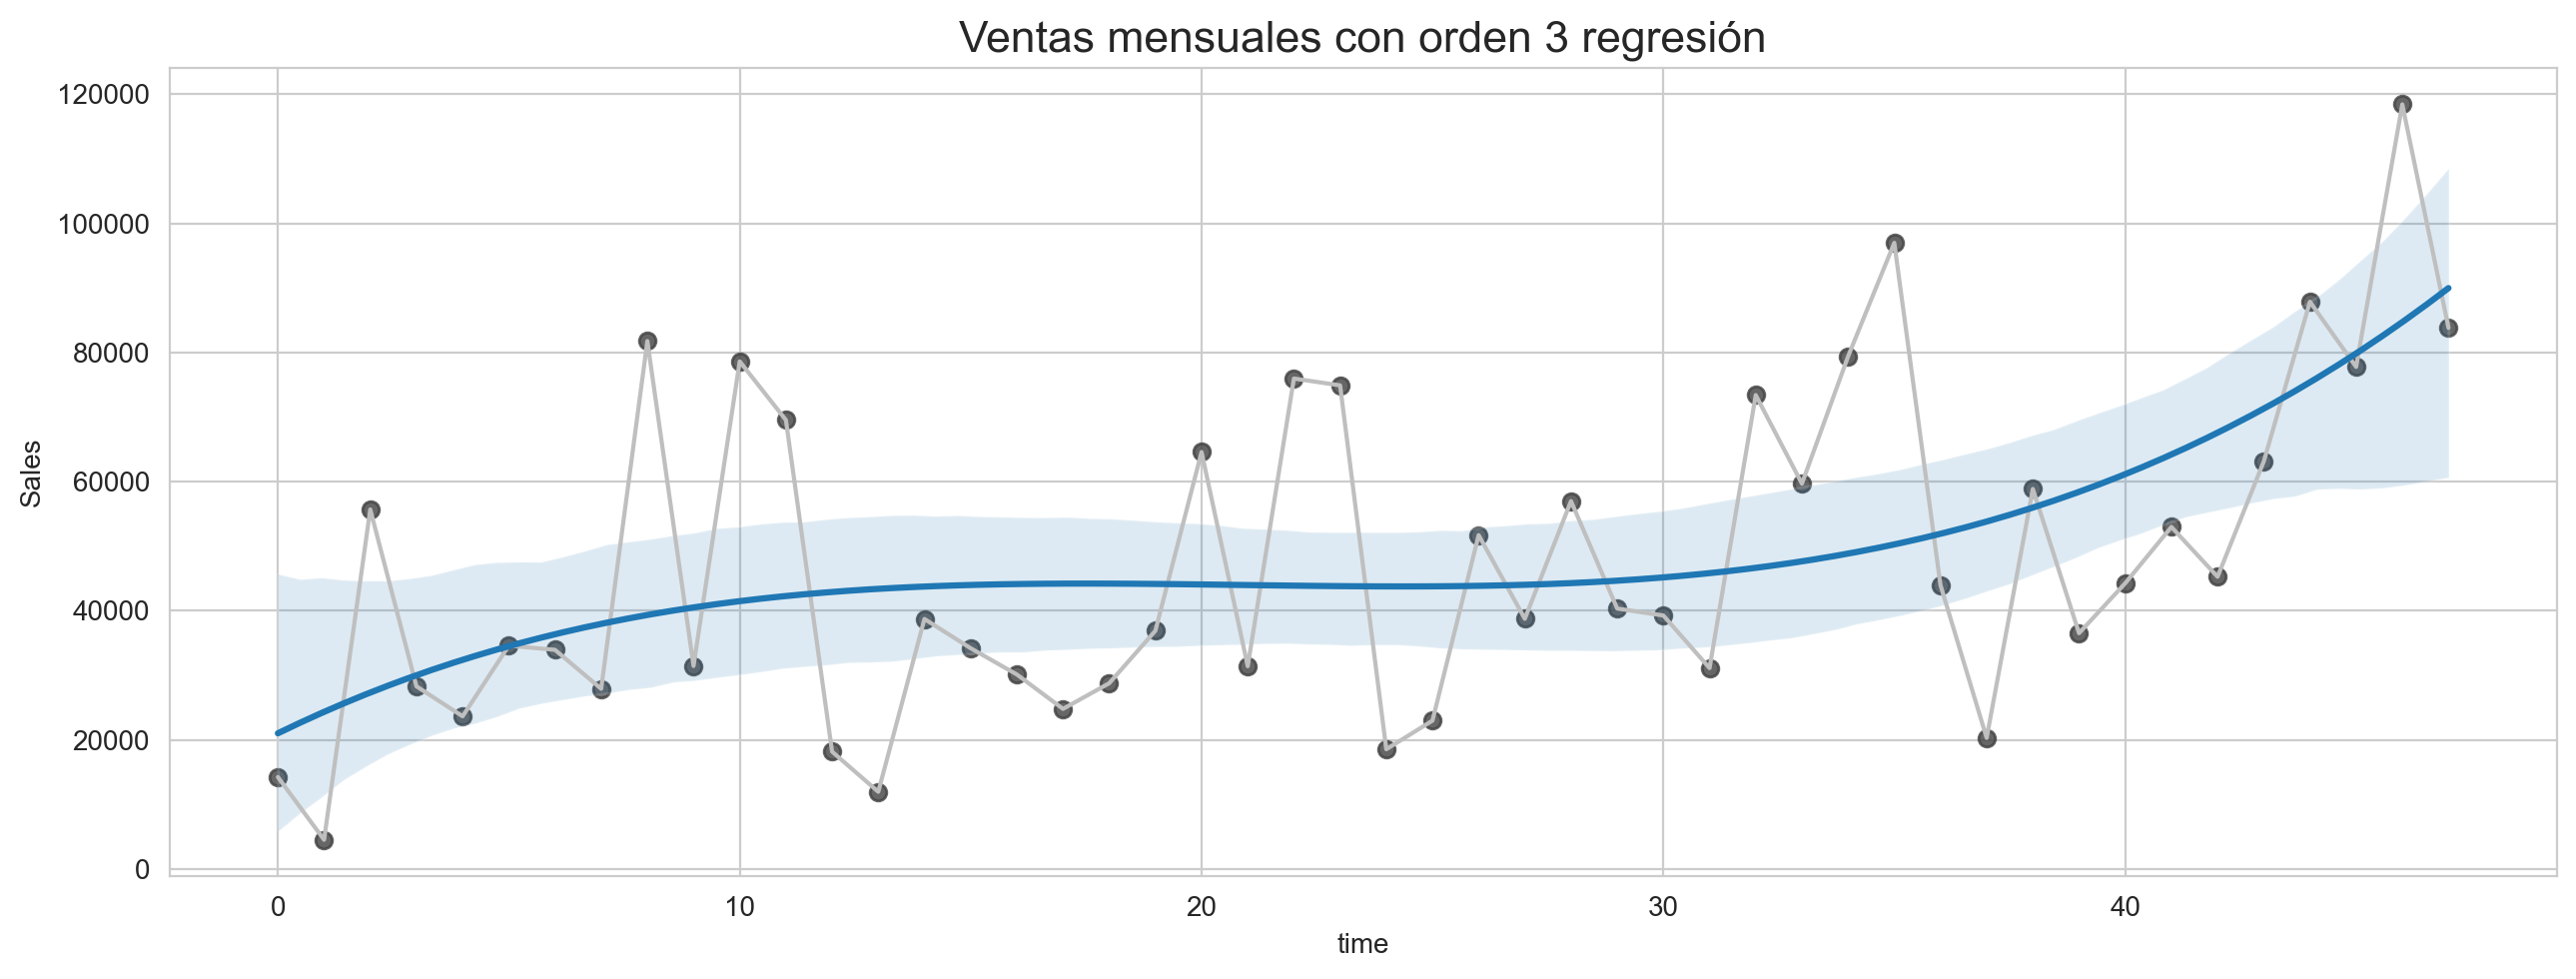

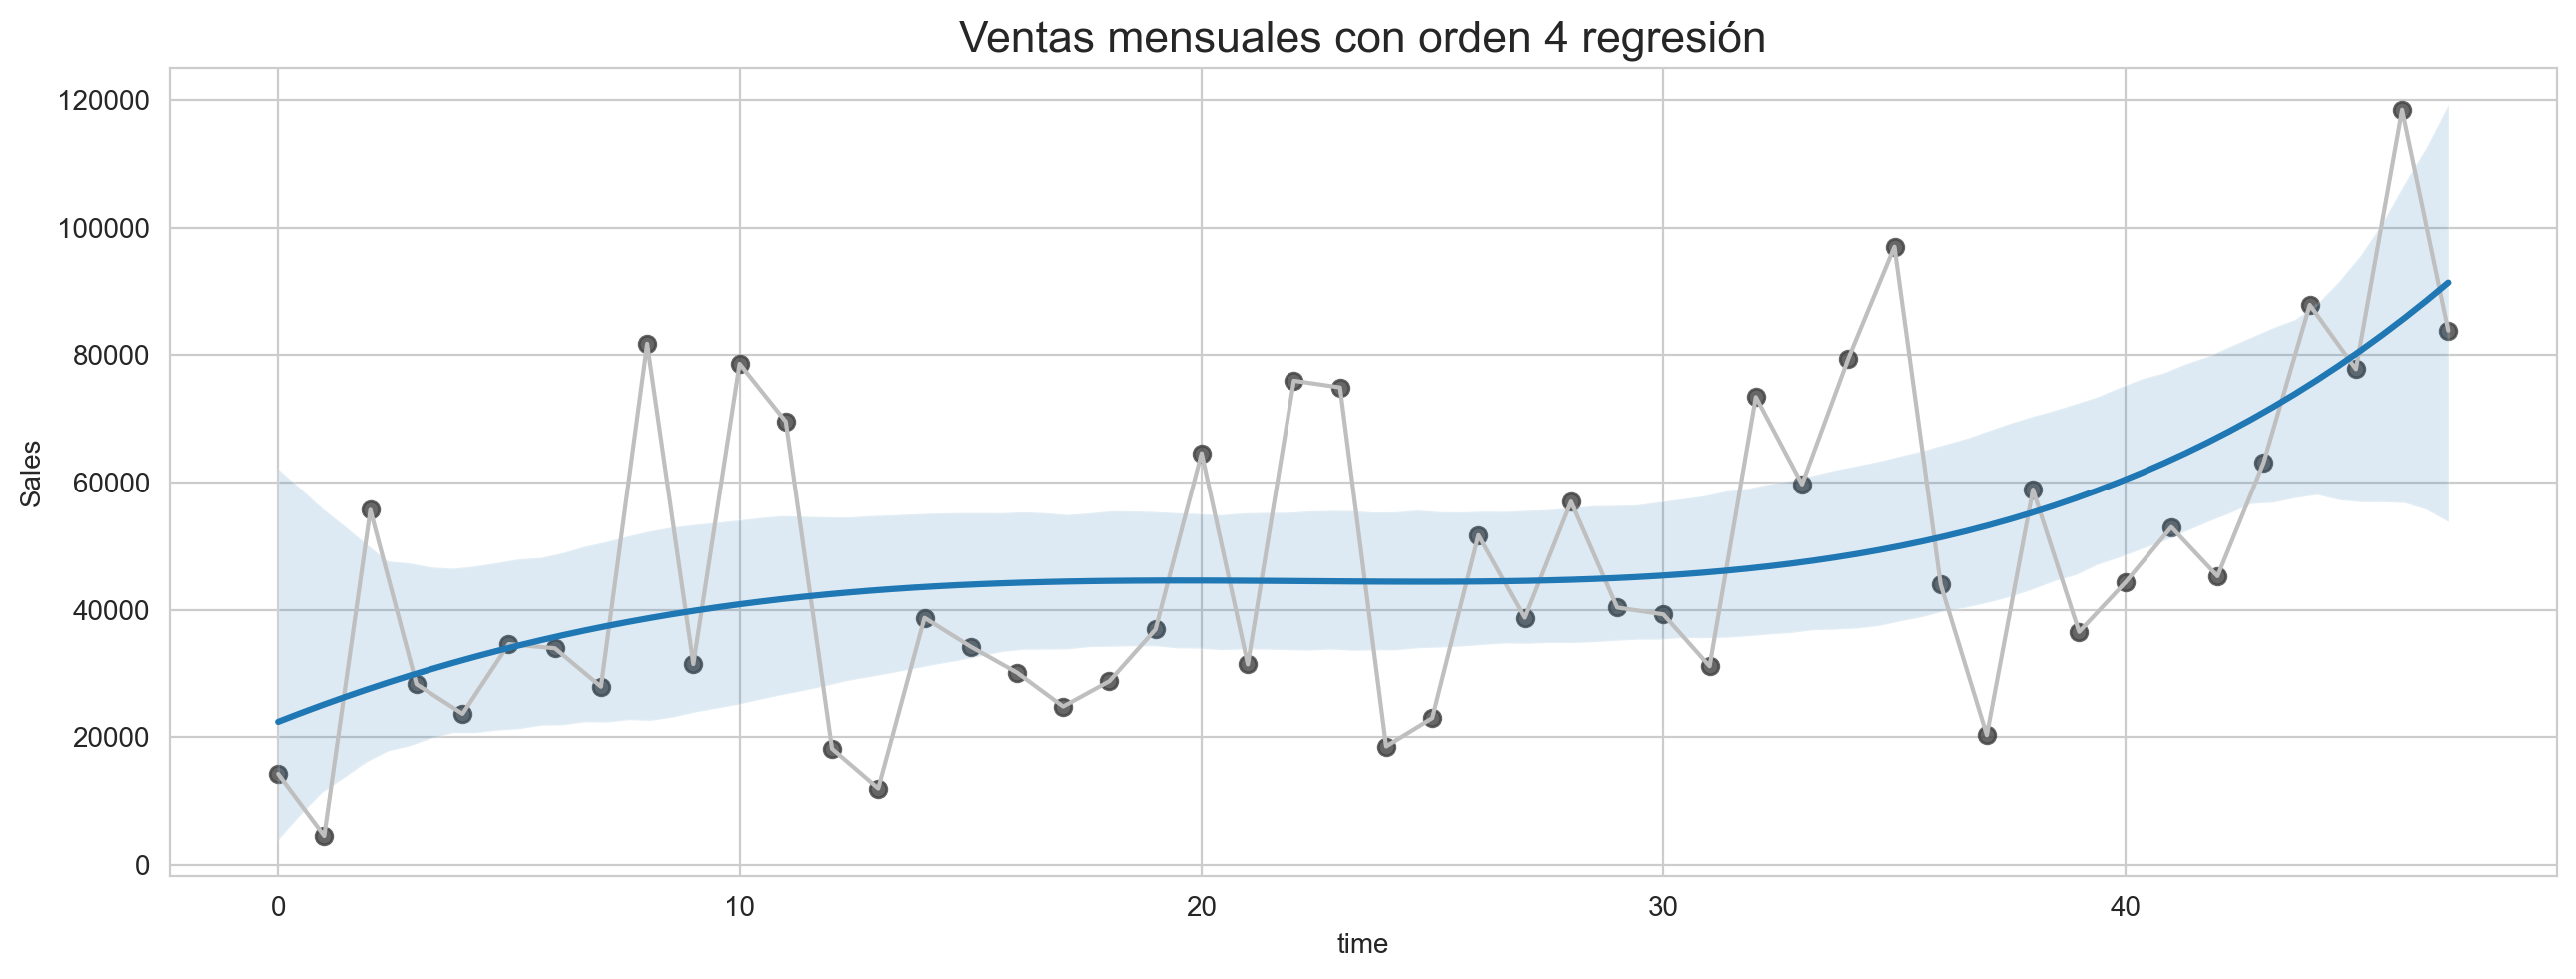

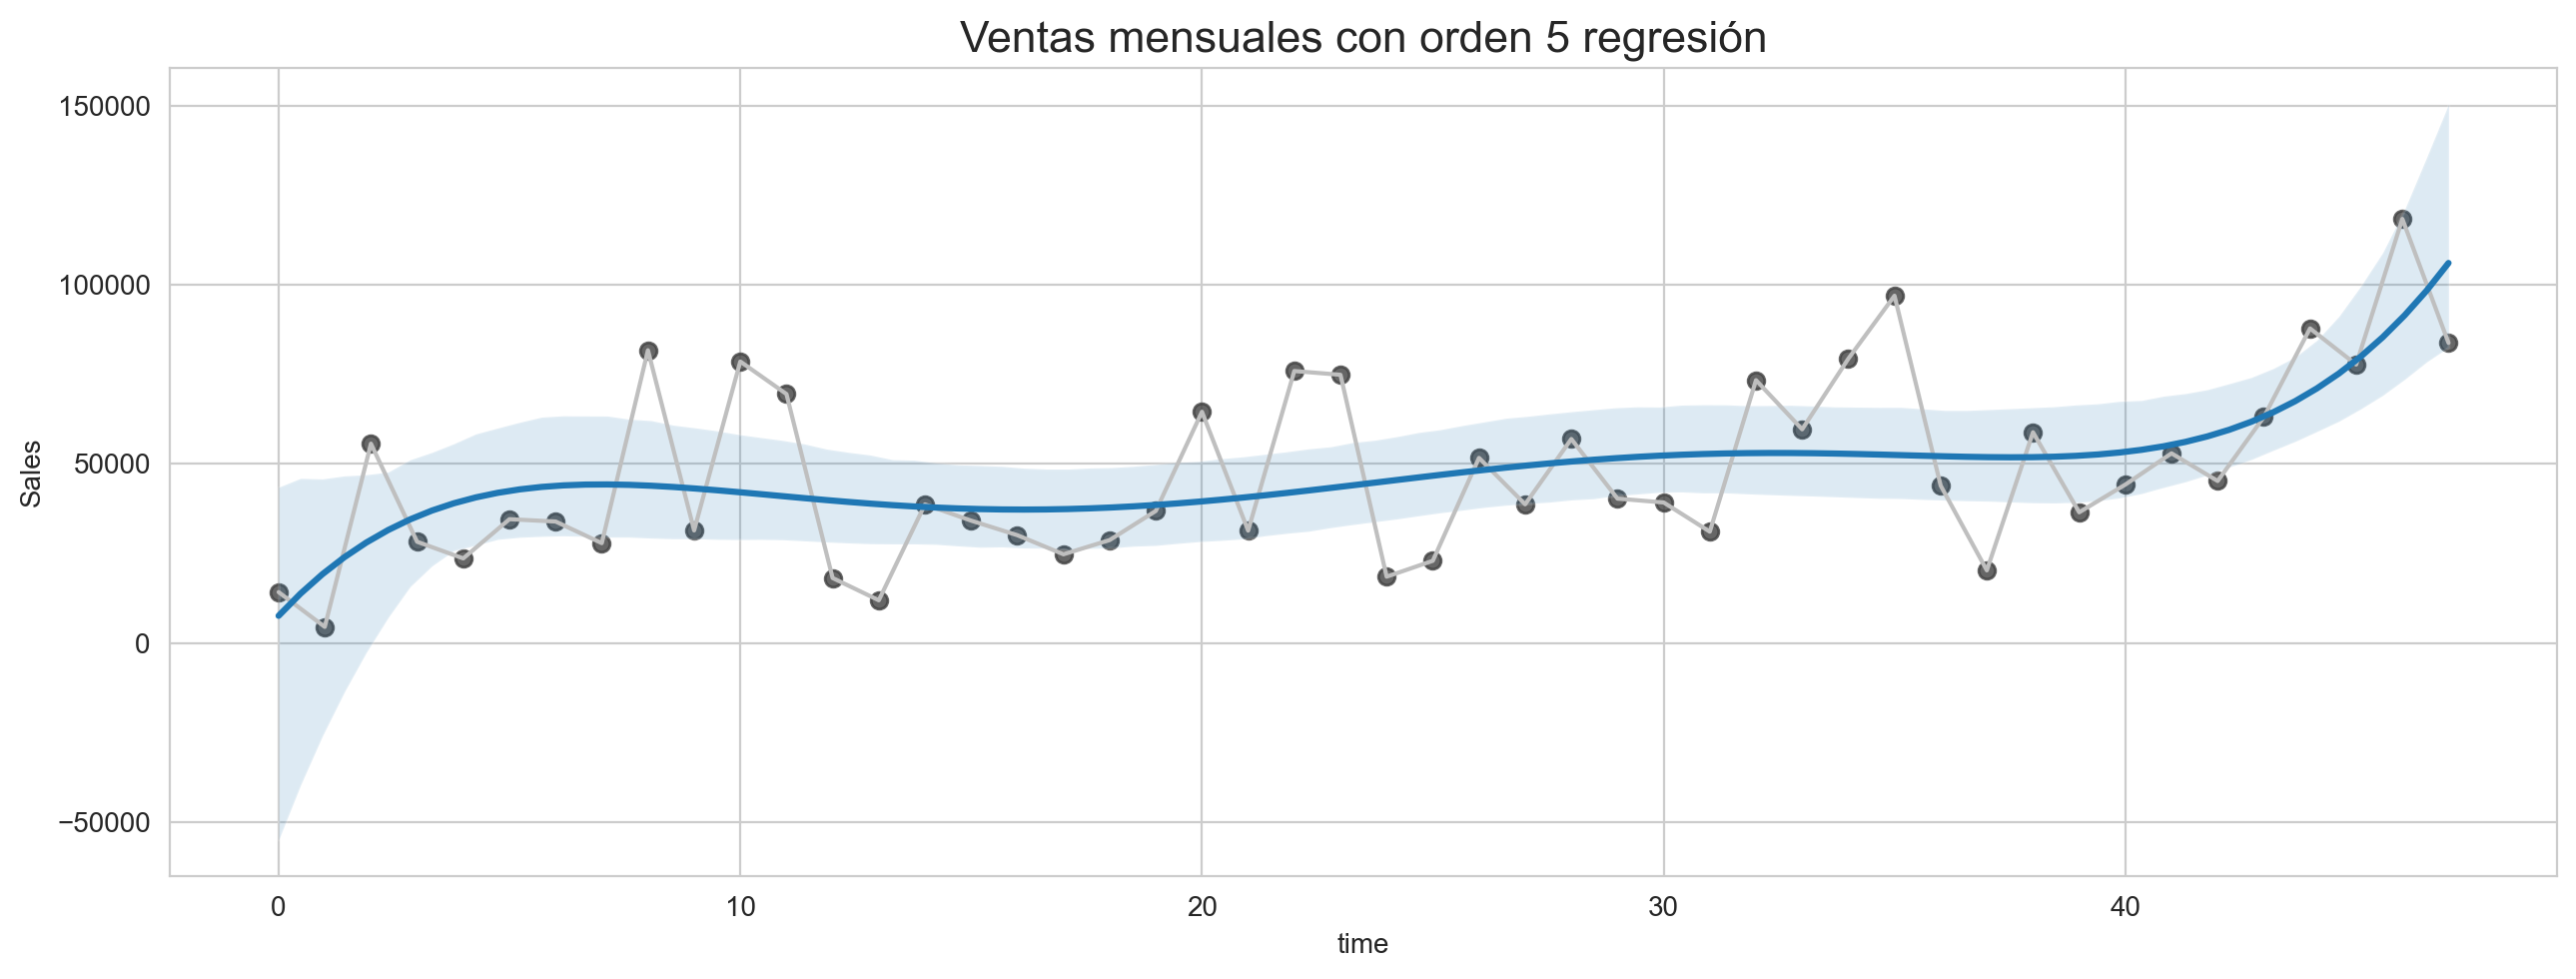

In [166]:
def plot_trend(order=1):
    sns.set_style('whitegrid')
    plt.rc('figure', autolayout = True, figsize= (13,5), titlesize = 18)
    plt.rc("axes", titlesize=16)
    %config InlineBackend.figure_format = 'retina'
    fig, ax = plt.subplots()
    ax.plot(ventas_por_mes['time'], ventas_por_mes['Sales'], color='0.75')
    ax = sns.regplot(data=ventas_por_mes, x='time', y='Sales', scatter_kws=dict(color='0.25'), order=order)
    ax.set_title('Ventas mensuales con orden {} regresión'.format(order));
for order in range(1,6):
    plot_trend(order)

In [167]:
x_p = ventas_por_mes['time'].to_numpy().reshape(48,1)
y_p = ventas_por_mes['Sales'].to_numpy().reshape(48,1)

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_p, y_p, test_size=0.2)

In [169]:
poli_reg = PolynomialFeatures(degree = 3)

In [170]:
x_train_poli = poli_reg.fit_transform(x_train_p)
x_test_poli = poli_reg.fit_transform(x_test_p)

In [171]:
from sklearn import linear_model
pr = linear_model.LinearRegression()

In [172]:
pr.fit(x_train_poli, y_train_p)

LinearRegression()

In [173]:
Y_pred_pr = pr.predict(x_test_poli)

In [174]:
Y_pred_pr.astype('int').shape[0]

10

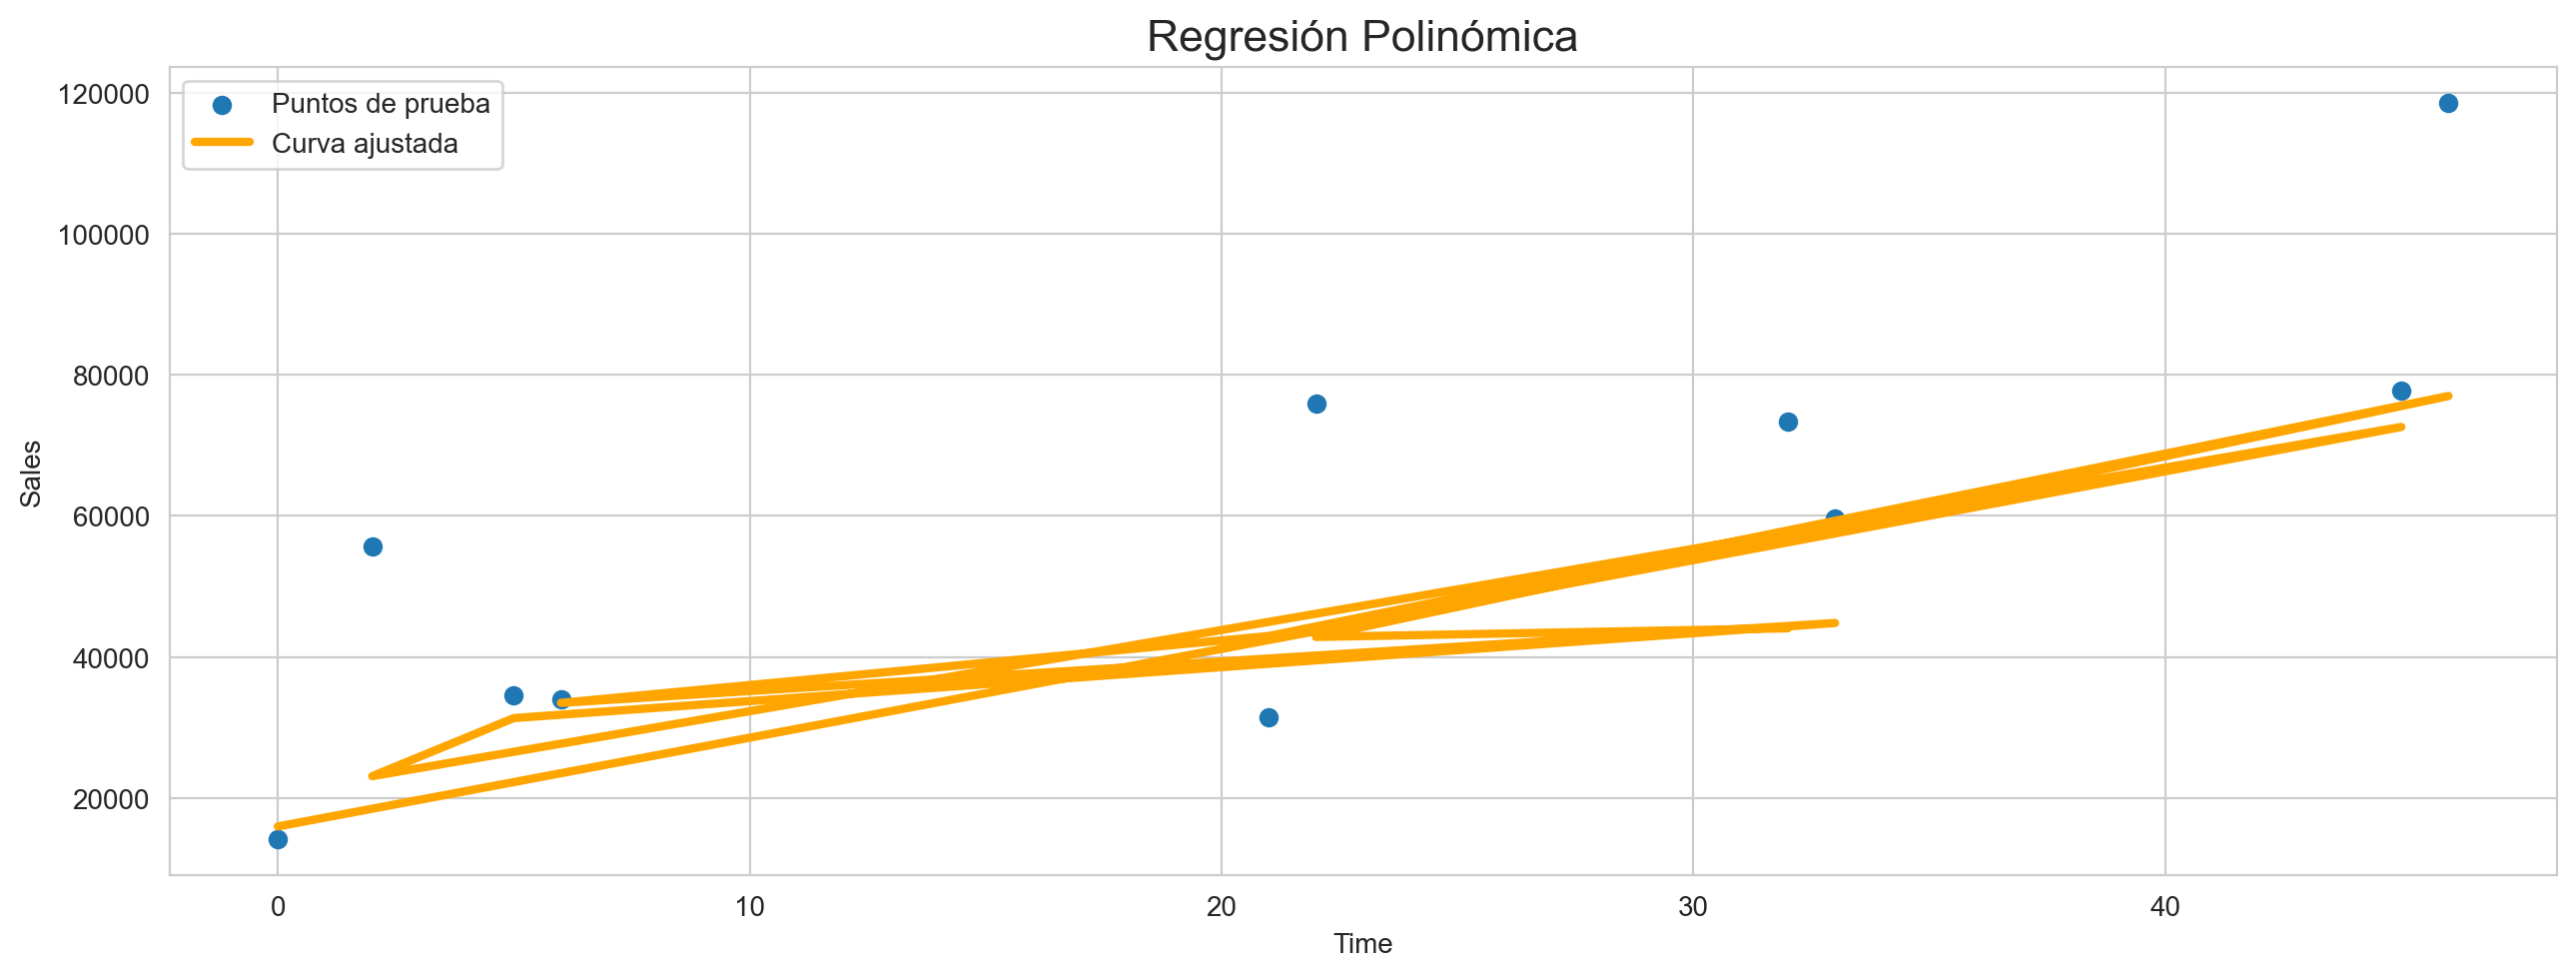

In [175]:
plt.scatter(x_test_p, y_test_p, label='Puntos de prueba')
plt.plot(x_test_p, Y_pred_pr, color='orange', linewidth=3, label='Curva ajustada')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()

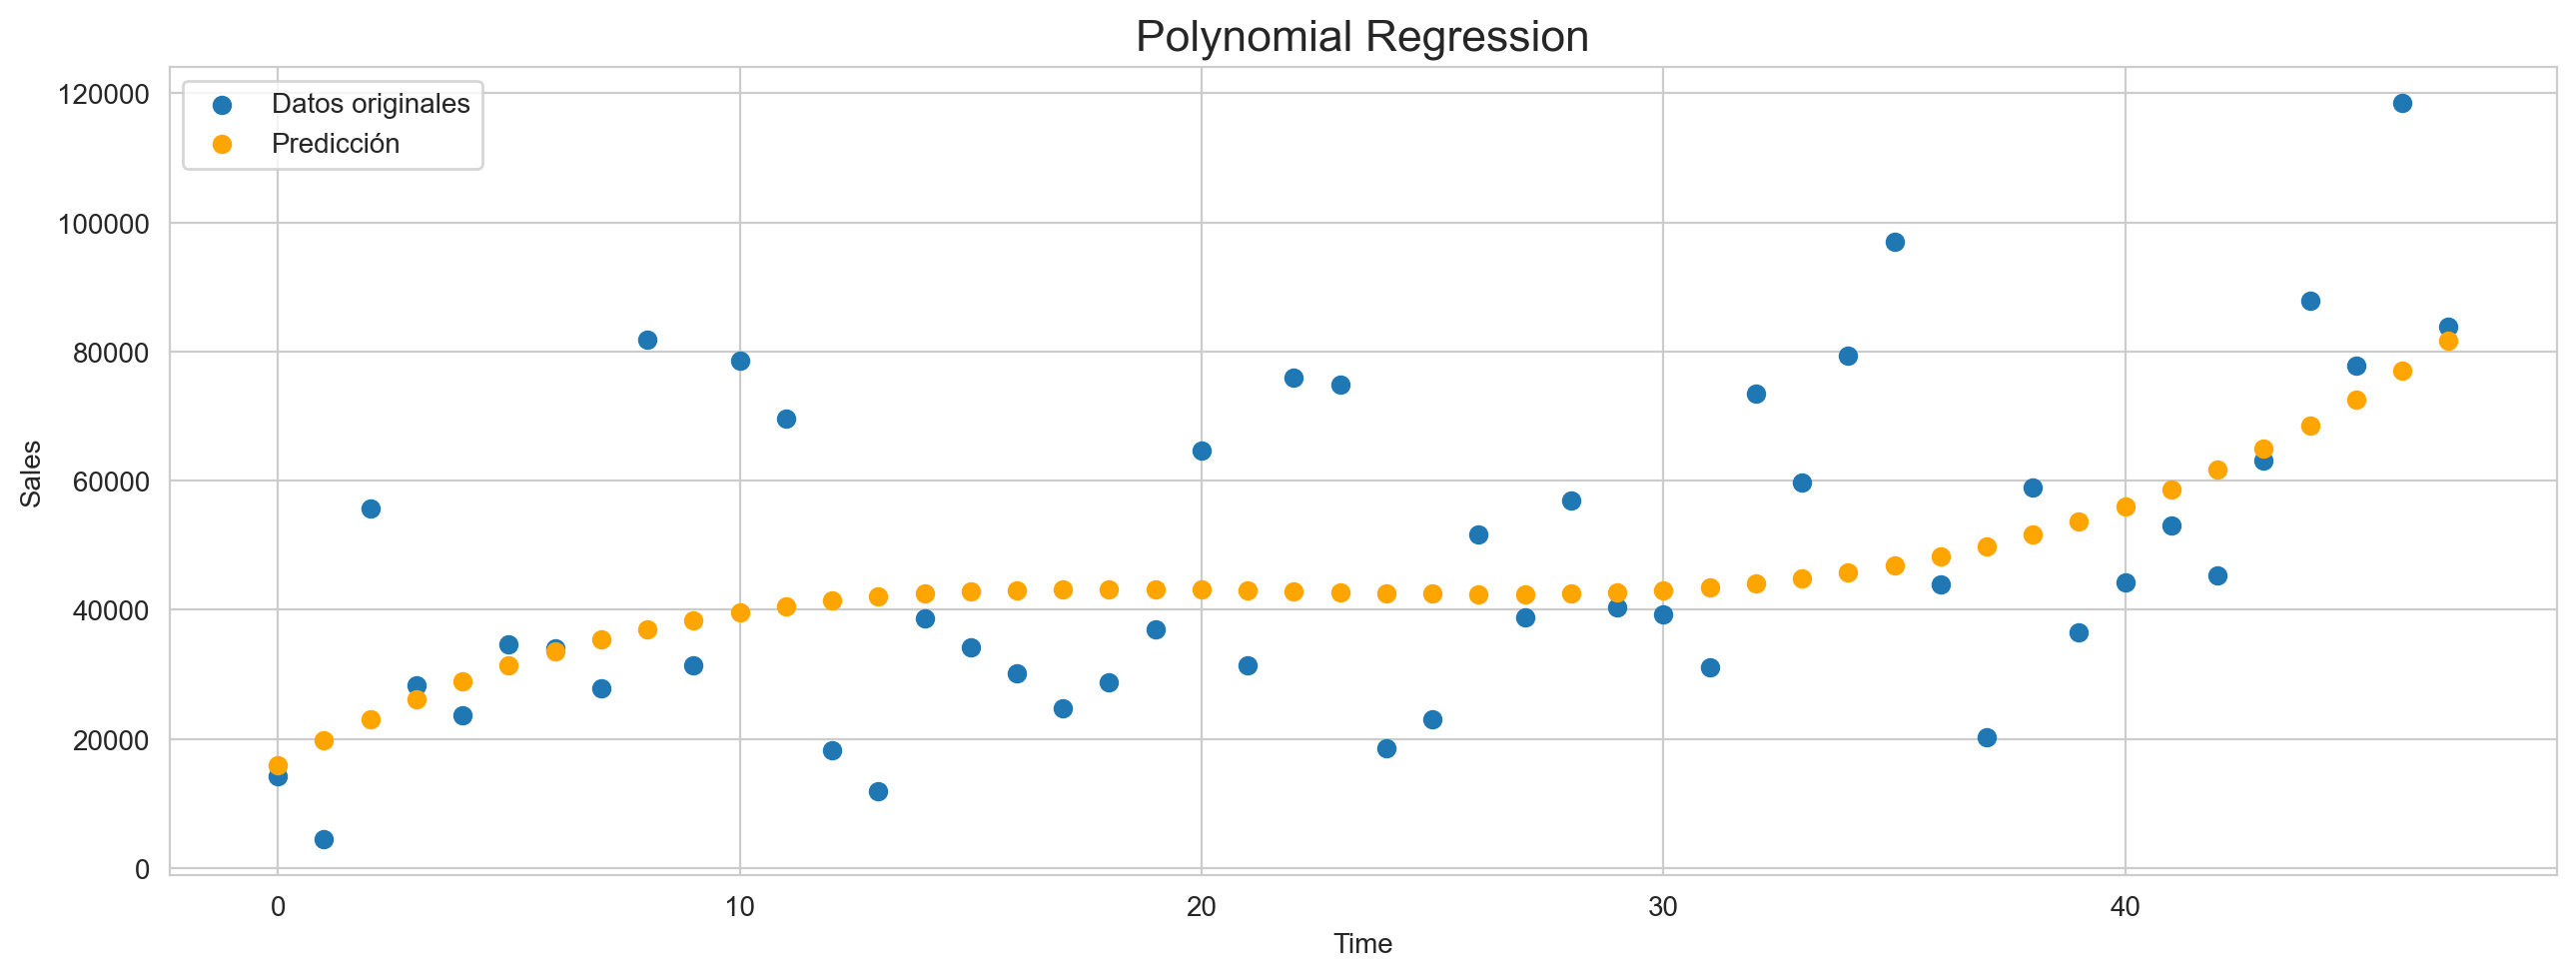

In [177]:
x_pred = np.arange(0, 48).reshape(-1, 1)

x_pred_poli = poli_reg.transform(x_pred)

y_pred = pr.predict(x_pred_poli)

plt.scatter(ventas_por_mes['time'], ventas_por_mes['Sales'], label='Datos originales')
plt.scatter(x_pred, y_pred, color='orange', label='Predicción')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [178]:
x_pred = np.arange(48, 60).reshape(-1,1)
x_pred_poli = poli_reg.transform(x_pred)
y_pred = pr.predict(x_pred_poli)
y_pred_dia = pr.predict(x_pred_poli)/30

Predicciones por mes

In [179]:
y_pred.astype('int')

array([[ 86950],
       [ 92571],
       [ 98637],
       [105166],
       [112173],
       [119675],
       [127689],
       [136231],
       [145319],
       [154968],
       [165194],
       [176016]])

In [180]:
y_pred_dia.astype('int')

array([[2898],
       [3085],
       [3287],
       [3505],
       [3739],
       [3989],
       [4256],
       [4541],
       [4843],
       [5165],
       [5506],
       [5867]])

In [181]:
print('Precicion del modelo:')
print(pr.score(x_train_poli, y_train_p))

Precicion del modelo:
0.22876157259660013


In [182]:
from sklearn.linear_model import LinearRegression

def fit_polynomial_regression(order=1):
    polynomial_features = PolynomialFeatures(degree=order)
    x_train_p_poly = polynomial_features.fit_transform(x_train_p)
    x_test_p_poly = polynomial_features.transform(x_test_p)
    
    model = LinearRegression()
    model.fit(x_train_p_poly, y_train_p)
    
    train_score = model.score(x_train_p_poly, y_train_p)
    test_score = model.score(x_test_p_poly, y_test_p)
    
    print(f"Regresión Polinómica (Orden {order}):")
    print(f"  - Puntaje R^2: {train_score:.2f}")
    print(f"  - Puntaje R^2 en Prueba: {test_score:.2f}")
    print("")
for order in range(1, 6):
    fit_polynomial_regression(order)

Regresión Polinómica (Orden 1):
  - Puntaje R^2: 0.17
  - Puntaje R^2 en Prueba: 0.26

Regresión Polinómica (Orden 2):
  - Puntaje R^2: 0.18
  - Puntaje R^2 en Prueba: 0.31

Regresión Polinómica (Orden 3):
  - Puntaje R^2: 0.23
  - Puntaje R^2 en Prueba: 0.39

Regresión Polinómica (Orden 4):
  - Puntaje R^2: 0.23
  - Puntaje R^2 en Prueba: 0.32

Regresión Polinómica (Orden 5):
  - Puntaje R^2: 0.31
  - Puntaje R^2 en Prueba: 0.22



In [380]:
r2_2 = r2_score(y_test_p, Y_pred_pr)
mae_2 = mean_absolute_error(y_test_p, Y_pred_pr)
mse_2 = mean_squared_error(y_test_p, Y_pred_pr)
rmse_2 = np.sqrt(mse_2)
medae_2 = median_absolute_error(y_test_p, Y_pred_pr)
me_2 = max_error(y_test_p, Y_pred_pr)
evs_2 = explained_variance_score(y_test_p, Y_pred_pr)
mape_2 = mean_absolute_percentage_error(y_test_p, Y_pred_pr)

# Imprime las métricas
print("R2 Score (Coeficiente de determinación): {:.2f}".format(r2_2))
print("Error Absoluto Medio (MAE): {:.2f}".format(mae_2))
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse_2))
print("Raíz del Error Cuadrático Medio (RMSE): {:.2f}".format(rmse_2))
print("Error Absoluto Mediano (MEDAE): {:.2f}".format(medae_2))
print("Error Máximo (ME): {:.2f}".format(me_2))
print("Varianza Explicada (EVS): {:.2f}".format(evs_2))
print("Error Porcentual Absoluto Medio (MAPE): {:.2f}".format(mape_2))

R2 Score (Coeficiente de determinación): 0.39
Error Absoluto Medio (MAE): 17361.08
Error Cuadrático Medio (MSE): 513645217.92
Raíz del Error Cuadrático Medio (RMSE): 22663.74
Error Absoluto Mediano (MEDAE): 13220.45
Error Máximo (ME): 41469.63
Varianza Explicada (EVS): 0.64
Error Porcentual Absoluto Medio (MAPE): 0.27


### Regresion lineal: segunda manera

In [411]:
from statsmodels.tsa.deterministic  import DeterministicProcess, CalendarFourier

fourier = CalendarFourier(freq = 'ME', order = 3)
dp = DeterministicProcess(
    index=ventas_por_mes.index,
    constant=True,
    order=2,
    additional_terms = [fourier],
    seasonal =True,
    drop=True,         
)
X = dp.in_sample()

In [418]:
y = ventas_por_mes['Sales']
X_train= X.loc[:'2016-12']
X_test = X.loc['2017-01':]
y_train = y.loc[:'2016-12']
y_test = y.loc['2017-01':]

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred1 = pd.Series(model.predict(X_train), index = X_train.index)
y_pred2 = pd.Series(model.predict(X_test), index = X_test.index)
y_forecast = pd.Series(model.predict(dp.out_of_sample(steps = 12)), index = dp.out_of_sample(steps = 12).index)

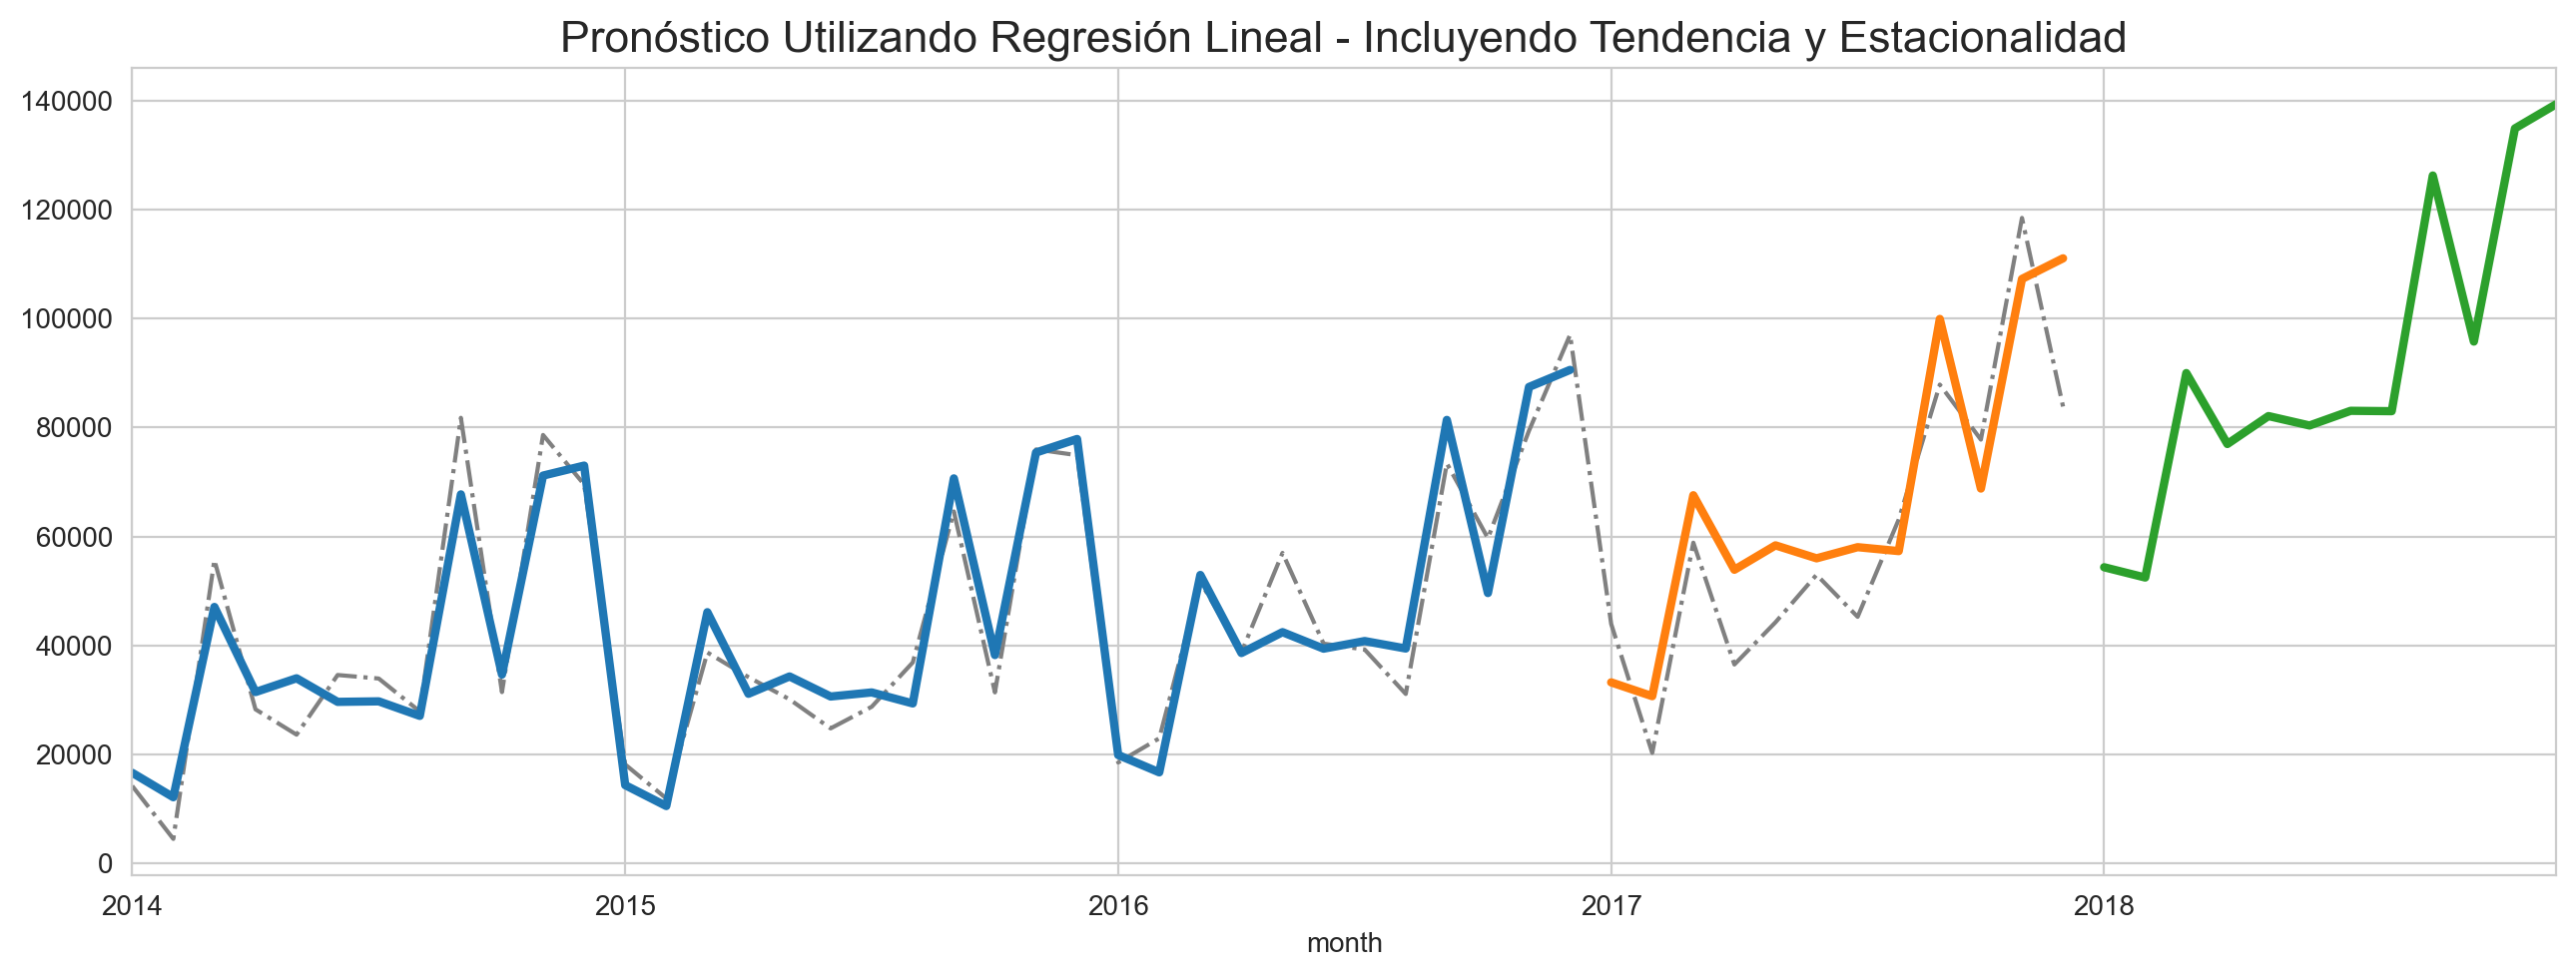

In [413]:
ax = ventas_por_mes['Sales'].plot(style="-.", color="0.5", title="Pronóstico Utilizando Regresión Lineal - Incluyendo Tendencia y Estacionalidad")
ax = y_pred1.plot(ax=ax, linewidth=3, label="tendencia")
ax = y_pred2.plot(ax =ax, linewidth=3)
ax = y_forecast.plot(ax=ax, linewidth=3, label="Pronóstico tendencia")

In [414]:
r2_3 = r2_score(y_test, y_pred2)
mae_3 = mean_absolute_error(y_test, y_pred2)
mse_3 = mean_squared_error(y_test, y_pred2)
msle_3 = mean_squared_log_error(y_test,y_pred2)
mape_3 = mean_absolute_percentage_error(y_test, y_pred2)
medae_3 = median_absolute_error(y_test, y_pred2)
me_3 = max_error(y_test, y_pred2)
evs_3 = explained_variance_score(y_test, y_pred2)
mpl_3 = mean_pinball_loss(y_test, y_pred2)
d2t_3 = d2_tweedie_score(y_test, y_pred2)
d2p_3 = d2_pinball_score(y_test, y_pred2)

print("R2 Score (Coeficiente de determinación): {:.2f}".format(r2_3))
print("Error Absoluto Medio (MAE): {:.2f}".format(mae_3))
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse_3))
print("Error cuadrático medio del logaritmo (MSLE): {:.2f}".format(msle_3))
print("Error Porcentual Absoluto Medio (MAPE): {:.2f}".format(mape_3))
print("Error Absoluto Mediano (MEDAE): {:.2f}".format(medae_3))
print("Error Máximo (ME): {:.2f}".format(me_3))
print("Varianza Explicada (EVS): {:.2f}".format(evs_3))
print("Pérdida Media de Pinball (MPL): {:.2f}".format(mpl_3))
print("Puntuación Tweedie D^2 (D2T): {:.2f}".format(d2t_3))
print("Puntuación de Pinball D^2 (D2P): {:.2f}".format(d2p_3))

R2 Score (Coeficiente de determinación): 0.74
Error Absoluto Medio (MAE): 11861.97
Error Cuadrático Medio (MSE): 174796716.00
Error cuadrático medio del logaritmo (MSLE): 0.06
Error Porcentual Absoluto Medio (MAPE): 0.23
Error Absoluto Mediano (MEDAE): 10961.59
Error Máximo (ME): 27206.23
Varianza Explicada (EVS): 0.79
Pérdida Media de Pinball (MPL): 5930.99
Puntuación Tweedie D^2 (D2T): 0.74
Puntuación de Pinball D^2 (D2P): 0.42


In [415]:
(y_forecast).astype('int')

2018-01-01     54362
2018-02-01     52476
2018-03-01     89985
2018-04-01     76970
2018-05-01     82094
2018-06-01     80365
2018-07-01     83059
2018-08-01     82991
2018-09-01    126226
2018-10-01     95762
2018-11-01    134867
2018-12-01    139299
Freq: MS, dtype: int32

### Regresión lineal con Ada Boost: tercera manera

In [383]:
X_train= X.loc[:'2016-12']
X_test = X.loc['2017-01':]
y_train = y.loc[:'2016-12']
y_test = y.loc['2017-01':]

from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 40 , estimator = LinearRegression(), loss='square', learning_rate = 0.5, random_state =21)
ada.fit(X_train,y_train)

y_pred3 = pd.Series(ada.predict(X_train), index = X_train.index)
y_pred4 = pd.Series(ada.predict(X_test), index = X_test.index)
y_forecast = pd.Series(ada.predict(dp.out_of_sample(steps = 12)), index = dp.out_of_sample(steps = 12).index)

r_squared_fit = r2_score(y_train,y_pred3)
r_squared_test = r2_score(y_test,y_pred4)

print(r_squared_fit)
print(r_squared_test)

0.944132798302055
0.7691982659169184


In [416]:
proximos_meses = pd.date_range(start='2018-01-01', periods=12, freq='ME')

X_proximos_meses = dp.out_of_sample(steps=12)

y_pred_proximos_meses = ada.predict(X_proximos_meses)

ventas_predichas_proximos_meses = pd.Series(y_pred_proximos_meses, index=proximos_meses)
print(ventas_predichas_proximos_meses.astype('int'))

2018-01-31     51152
2018-02-28     48562
2018-03-31     88409
2018-04-30     71958
2018-05-31     77124
2018-06-30     71040
2018-07-31     73405
2018-08-31     74204
2018-09-30    122416
2018-10-31     93483
2018-11-30    125529
2018-12-31    127017
Freq: ME, dtype: int32


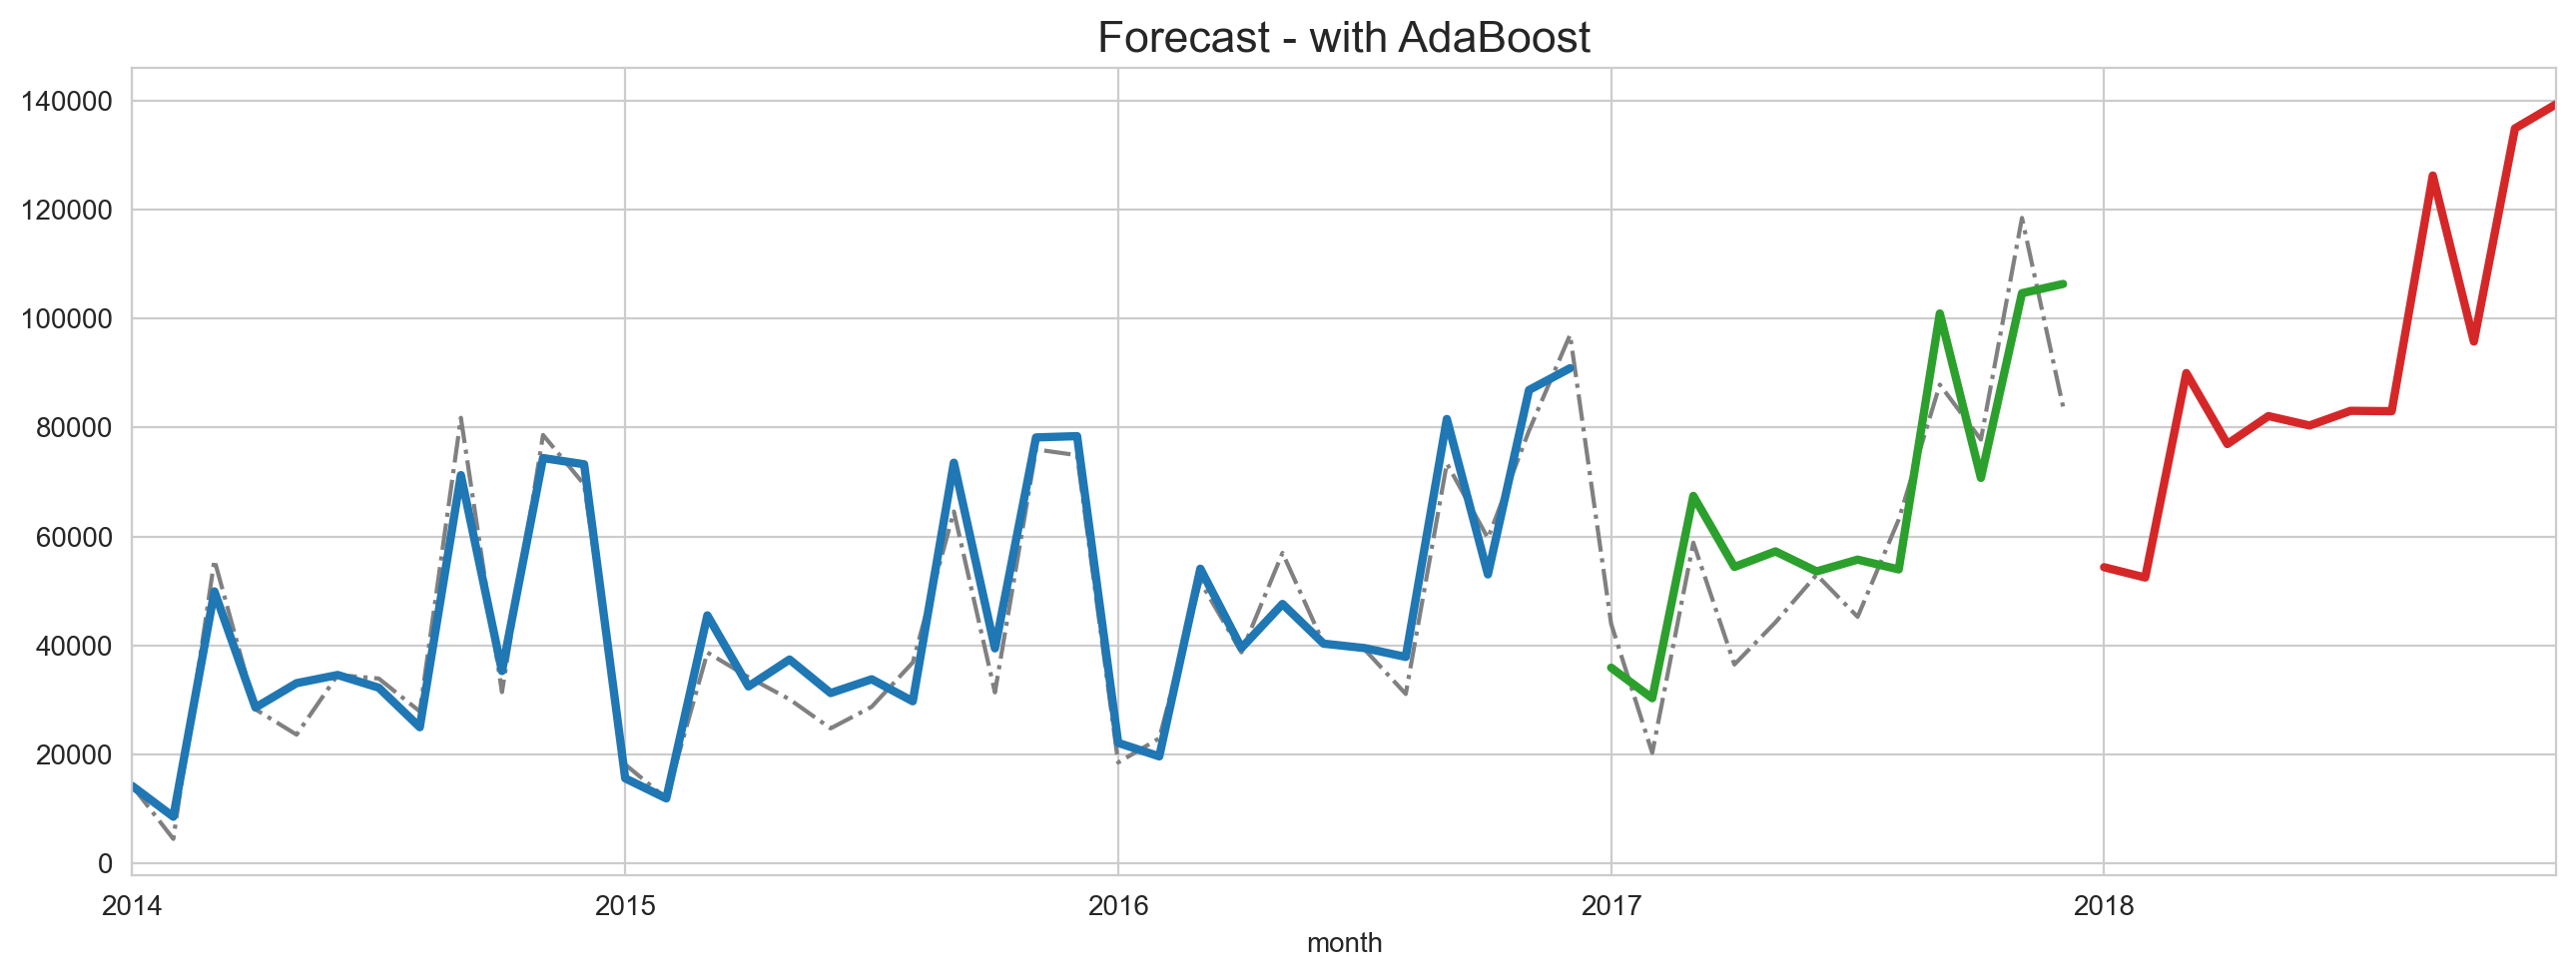

In [417]:
ax = y.plot(style="-.", color="0.5", title="Forecast - with AdaBoost")
ax = y_pred3.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred4.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C2')
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')

In [420]:
r2_4 = r2_score(y_test, y_pred4)
mae_4 = mean_absolute_error(y_test, y_pred4)
mse_4 = mean_squared_error(y_test, y_pred4)
rmse_4 = sqrt(mse_4)
msle_4 = mean_squared_log_error(y_test,y_pred4)
mape_4 = mean_absolute_percentage_error(y_test, y_pred4)
medae_4 = median_absolute_error(y_test, y_pred4)
me_4 = max_error(y_test, y_pred4)
evs_4 = explained_variance_score(y_test, y_pred4)
mpl_4 = mean_pinball_loss(y_test, y_pred4)
d2t_4 = d2_tweedie_score(y_test, y_pred4)
d2p_4 = d2_pinball_score(y_test, y_pred4)

print("R2 Score (Coeficiente de determinación): {:.2f}".format(r2_4))
print("Error Absoluto Medio (MAE): {:.2f}".format(mae_4))
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse_4))
print("Raíz del Error Cuadrático Medio (RMSE): {:.2f}".format(mse_4))
print("Error cuadrático medio del logaritmo (MSLE): {:.2f}".format(msle_4))
print("Error Porcentual Absoluto Medio (MAPE): {:.2f}".format(mape_4))
print("Error Absoluto Mediano (MEDAE): {:.2f}".format(medae_4))
print("Error Máximo (ME): {:.2f}".format(me_4))
print("Varianza Explicada (EVS): {:.2f}".format(evs_4))
print("Pérdida Media de Pinball (MPL): {:.2f}".format(mpl_4))
print("Puntuación Tweedie D^2 (D2T): {:.2f}".format(d2t_4))
print("Puntuación de Pinball D^2 (D2P): {:.2f}".format(d2p_4))

R2 Score (Coeficiente de determinación): 0.77
Error Absoluto Medio (MAE): 11185.61
Error Cuadrático Medio (MSE): 153315308.63
Raíz del Error Cuadrático Medio (RMSE): 153315308.63
Error cuadrático medio del logaritmo (MSLE): 0.05
Error Porcentual Absoluto Medio (MAPE): 0.22
Error Absoluto Mediano (MEDAE): 10263.49
Error Máximo (ME): 22504.21
Varianza Explicada (EVS): 0.80
Pérdida Media de Pinball (MPL): 5592.81
Puntuación Tweedie D^2 (D2T): 0.77
Puntuación de Pinball D^2 (D2P): 0.46
